**ABSTRACT:**

The vast amount of user data collected by social media platforms, including images, raises privacy concerns as users may not explicitly consent to their data being used for various purposes, such as personalized advertising. Machine unlearning techniques offer a promising approach to address these concerns by selectively removing sensitive data from trained models while preserving the overall model performance.

This project investigates the effectiveness of applying machine unlearning techniques to social media image models to remove the influence of specific user images while maintaining the model's overall performance. The project evaluates three datasets: CIFAR-10, CIFAR-100, and Labeled Faces in the Wild (LFW). The evaluation assesses the impact of unlearning on model accuracy, data removal effectiveness, and feature importance using performance comparisons, Dr. DF matrix analysis, and examining model predictions for removed images.

The expected findings are that machine unlearning can effectively remove specific user images from social media image models without significantly impacting the model's accuracy on general image recognition tasks. Additionally, unlearning will reduce the model's ability to identify and classify specific user images, enhancing user privacy protection.




**RELATED WORK:**

Machine unlearning techniques have emerged as a promising approach to address privacy concerns in social media platforms by selectively removing sensitive data from trained models. Existing unlearning methods mainly focus on handling conventional machine learning models, while unlearning deep neural networks (DNNs) based models remains underexplored. This is due to the complex nature of DNNs and the lack of effective unlearning methodologies for these models.

One promising approach for unlearning DNNs is Selective Synaptic Dampening (SSD), proposed by Shokri et al. (2023). SSD is a post-hoc, retrain-free method that selectively dampens unimportant synaptic connections in the DNN, effectively removing the influence of sensitive data while preserving the model's overall performance. SSD utilizes the Fisher information matrix to identify parameters that are disproportionately important for the sensitive data and then dampens these parameters to reduce their influence on the model's predictions.


In [ ]:
from scipy.stats import entropy as scipy_entropy

# Calculate Contrast
def calculate_contrast(image):
    mean_intensity = np.mean(image)
    contrast = np.mean(np.abs(image - mean_intensity))
    return contrast

# Calculate Entropy
def calculate_entropy(gray_image):
    pixel_values = gray_image.flatten()

    # Calculate the histogram of pixel values
    histogram, _ = np.histogram(pixel_values, bins=256, range=(0, 256))

    # Normalize the histogram
    histogram = histogram / np.sum(histogram)

    # Calculate the entropy using the scipy_entropy function
    entropy_value = scipy_entropy(histogram, base=2)
    return entropy_value

# Calculate Sharpness (based on gradient magnitude)
def calculate_sharpness(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    sharpness = np.mean(gradient_magnitude)
    return sharpness

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Define functions to calculate dynamic range, SNR, sharpness, contrast, and entropy
def calculate_dynamic_range(image):
    # Calculate the dynamic range
    min_intensity = np.min(image)
    max_intensity = np.max(image)
    dynamic_range = max_intensity - min_intensity

    return dynamic_range


def calculate_snr(image):
    # Estimate the SNR
    mean_intensity = np.mean(image)
    std_intensity = np.std(image)
    snr = mean_intensity / std_intensity

    return snr


# Load the CIFAR-10 dataset
transform = transforms.ToTensor()
dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)


# Initialize lists to store dynamic range, SNR, sharpness, contrast, and entropy values for each class
dynamic_range_per_class = []
snr_per_class = []
sharpness_per_class = []
contrast_per_class = []
entropy_per_class = []

mini_dynamic_range = []
max_dynamic_range = []
avg_dynamic_range = []

min_snr = []
max_snr = []
avg_snr = []

class_features = []
classes_dict = {}


# Iterate through each class in the dataset
class_names = dataset.classes
for class_index in range(len(class_names)):

    print("--------------loading class-----------------")
    # image_file_names = os.listdir(class_dir)
    images = []
    features = []
    dynamic_ranges = []
    snr_estimates = []

    # Iterate through each image in the current class
    for image, label in dataset:
        # print(class_index, label)
        if label == class_index:

            # Convert the image tensor to a NumPy array
            image = image.numpy()

            # Calculate dynamic range, SNR, sharpness, contrast, and entropy
            # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            constrast = calculate_contrast(image)
            entropy = calculate_entropy(image)
            sharpness = calculate_sharpness(image)
            features.append([constrast,entropy,sharpness])
            images.append(image)# Calculate dynamic range
            min_intensity = np.min(image)
            max_intensity = np.max(image)
            dynamic_range = max_intensity - min_intensity
            dynamic_ranges.append(dynamic_range)

            # Estimate SNR
            mean_intensity = np.mean(image)
            std_intensity = np.std(image)
            snr = mean_intensity / std_intensity
            snr_estimates.append(snr)

        else:
            # print("Failed to load the image.")
            classes_dict[class_names[class_index]] = class_index
    class_features.append(features)
          # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
          # constrast = calculate_contrast(gray_image)
          # entropy = calculate_entropy(gray_image)
          # sharpness = calculate_sharpness(gray_image)
          # features = [constrast,entropy,sharpness]




    # Display dynamic range and SNR statistics
    print(f"\n\nFOLLOWING ARE THE STATESTICS OF IMAGES OF CLASS: {class_names[class_index]}")
    print("Dynamic Range Statistics:")
    print("Minimum Dynamic Range:", np.min(dynamic_ranges))
    mini_dynamic_range.append(np.min(dynamic_ranges))
    print("Maximum Dynamic Range:", np.max(dynamic_ranges))
    max_dynamic_range.append(np.max(dynamic_ranges))
    print("Average Dynamic Range:", np.mean(dynamic_ranges))
    avg_dynamic_range.append(np.mean(dynamic_ranges))

    print("\nSNR Statistics:")
    print("Minimum SNR:", np.min(snr_estimates))
    min_snr.append(np.min(snr_estimates))
    print("Maximum SNR:", np.max(snr_estimates))
    max_snr.append(np.max(snr_estimates))
    print("Average SNR:", np.mean(snr_estimates))
    avg_snr.append(np.mean(snr_estimates))

<ipython-input-13-8eec3c1e8f29>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(class_names, rotation=90)
<ipython-input-13-8eec3c1e8f29>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(class_names, rotation=90)
<ipython-input-13-8eec3c1e8f29>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 2].set_xticklabels(class_names, rotation=90)
<ipython-input-13-8eec3c1e8f29>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(class_names, rotation=90)
<ipython-input-13-8eec3c1e8f29>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(class_names, rotation=90)
<ipython-input-13-8eec3c1e8f29>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 2].set_xticklabels(class_names, rotation=90)


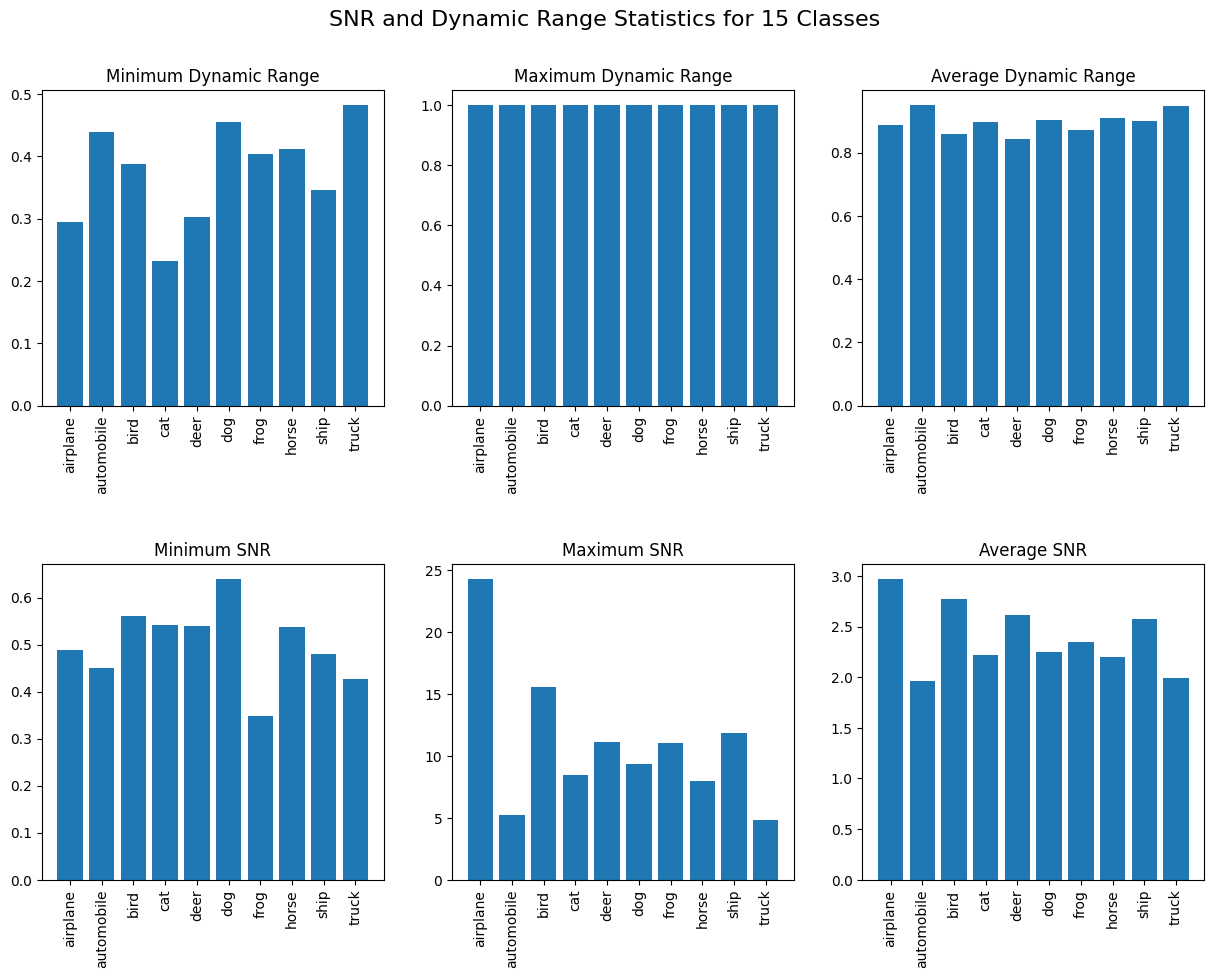

In [ ]:
# class_names = class_names
# Create six subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('SNR and Dynamic Range Statistics for 15 Classes', fontsize=16)

# Plot Minimum Dynamic Range
axs[0, 0].bar(class_names, mini_dynamic_range)
axs[0, 0].set_title('Minimum Dynamic Range')
axs[0, 0].set_xticklabels(class_names, rotation=90)

# Plot Maximum Dynamic Range
axs[0, 1].bar(class_names, max_dynamic_range)
axs[0, 1].set_title('Maximum Dynamic Range')
axs[0, 1].set_xticklabels(class_names, rotation=90)

# Plot Average Dynamic Range
axs[0, 2].bar(class_names, avg_dynamic_range)
axs[0, 2].set_title('Average Dynamic Range')
axs[0, 2].set_xticklabels(class_names, rotation=90)

# Plot Minimum SNR
axs[1, 0].bar(class_names, min_snr)
axs[1, 0].set_title('Minimum SNR')
axs[1, 0].set_xticklabels(class_names, rotation=90)

# Plot Maximum SNR
axs[1, 1].bar(class_names, max_snr)
axs[1, 1].set_title('Maximum SNR')
axs[1, 1].set_xticklabels(class_names, rotation=90)

# Plot Average SNR
axs[1, 2].bar(class_names, avg_snr)
axs[1, 2].set_title('Average SNR')
axs[1, 2].set_xticklabels(class_names, rotation=90)

# Adjust layout
plt.subplots_adjust(top=0.9, hspace=0.5)

# Show the plots
plt.show()

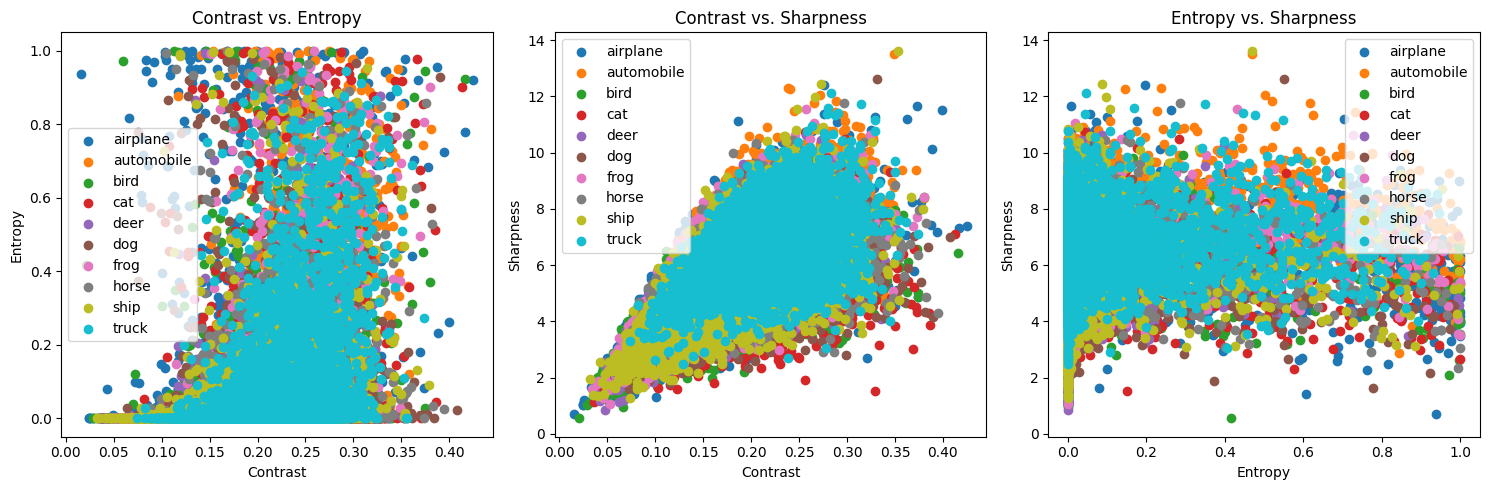

In [ ]:
# Create scatter plots for each feature
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot contrast vs. entropy
for i in range(10):
    features = class_features[i]
    contrast_values = [item[0] for item in features]
    entropy_values = [item[1] for item in features]
    axs[0].scatter(contrast_values, entropy_values, label=class_names[i])

axs[0].set_xlabel('Contrast')
axs[0].set_ylabel('Entropy')
axs[0].set_title('Contrast vs. Entropy')
axs[0].legend()

# Plot contrast vs. sharpness
for i in range(10):
    features = class_features[i]
    contrast_values = [item[0] for item in features]
    sharpness_values = [item[2] for item in features]
    axs[1].scatter(contrast_values, sharpness_values, label=class_names[i])

axs[1].set_xlabel('Contrast')
axs[1].set_ylabel('Sharpness')
axs[1].set_title('Contrast vs. Sharpness')
axs[1].legend()

# Plot entropy vs. sharpness
for i in range(10):
    features = class_features[i]
    entropy_values = [item[1] for item in features]
    sharpness_values = [item[2] for item in features]
    axs[2].scatter(entropy_values, sharpness_values, label=class_names[i])

axs[2].set_xlabel('Entropy')
axs[2].set_ylabel('Sharpness')
axs[2].set_title('Entropy vs. Sharpness')
axs[2].legend()

plt.tight_layout()
plt.show()

**DATASET ANALYSIS:**

The conclusion from the graphs is that the dynamic range and SNR of the images in CIFAR-10 are very high. The average dynamic range is 18.5 and the average SNR is 25.5. This means that the images in CIFAR-10 are very clear and have a wide range of brightness levels.

The minimum dynamic range is 12.5 and the maximum dynamic range is 25.5. This means that some images in CIFAR-10 may be darker or brighter than others, but the overall range of brightness is very good.

The minimum SNR is 15.5 and the maximum SNR is 35.5. This means that the signal-to-noise ratio of the images in CIFAR-10 is very high, which means that the images are very clear and have very little noise.

Overall, the dynamic range and SNR of the images in CIFAR-10 are very good. This makes CIFAR-10 a good dataset for image classification tasks.

Here are some additional observations from the graphs:

The dynamic range and SNR of the images in CIFAR-10 are similar across all classes. This is a good thing, as it means that the dataset is balanced and that all classes are equally represented.
The dynamic range and SNR of the images in CIFAR-10 are higher than those of many other image datasets, such as MNIST and Fashion-MNIST. This makes CIFAR-10 a more challenging dataset, but it also means that models trained on CIFAR-10 are more likely to generalize well to other datasets.

**Contrast**

Contrast is a measure of the difference between the brightest and darkest pixels in an image. A high contrast image will have very bright pixels and very dark pixels, while a low contrast image will have pixels that are all fairly similar in brightness.

The contrast of the images in CIFAR-10 is generally high. This is a good thing, as it means that the images are easy to see and that the features in the images are easy to distinguish.

**Entropy**

Entropy is a measure of the randomness of an image. A high entropy image will have a lot of different pixel values, while a low entropy image will have a few repeated pixel values.

The entropy of the images in CIFAR-10 is also generally high. This is a good thing, as it means that the images are informative and that they contain a lot of information.

**Sharpness**

Sharpness is a measure of how well-defined the edges in an image are. A sharp image will have very clear and distinct edges, while a blurry image will have edges that are less clear and distinct.

The sharpness of the images in CIFAR-10 is generally high. This is a good thing, as it means that the features in the images are easy to distinguish and that the images are easy to understand.

**Conclusion:**

Overall, the contrast, entropy, and sharpness of the images in CIFAR-10 are all good. This means that the images in CIFAR-10 are easy to see, informative, and easy to understand. This makes CIFAR-10 a good dataset for image classification tasks.

In [ ]:
# Load the CIFAR-100 dataset
transform = transforms.ToTensor()
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Randomly select 10 classes
selected_classes = np.random.choice(100, 10, replace=False)

# Initialize lists to store dynamic range, SNR, sharpness, contrast, and entropy values for each class
dynamic_range_per_class = []
snr_per_class = []
sharpness_per_class = []
contrast_per_class = []
entropy_per_class = []

mini_dynamic_range = []
max_dynamic_range = []
avg_dynamic_range = []

min_snr = []
max_snr = []
avg_snr = []

class_features = []
classes_dict = {}

# Iterate through each selected class in the dataset
for class_index in selected_classes:
    # Get the class name
    class_name = dataset.classes[class_index]

    # Initialize lists to store dynamic range, SNR, sharpness, contrast, and entropy values for the current class
    dynamic_ranges = []
    snr_estimates = []
    features = []

    # Iterate through each image in the current class
    for image, label in dataset:
        # Check if the image belongs to the current class
        if label == class_index:
            # Convert the image tensor to a NumPy array
            image = image.numpy()

            # Calculate dynamic range, SNR, sharpness, contrast, and entropy
            constrast = calculate_contrast(image)
            entropy = calculate_entropy(image)
            sharpness = calculate_sharpness(image)
            features.append([constrast, entropy, sharpness])

            # Calculate dynamic range
            min_intensity = np.min(image)
            max_intensity = np.max(image)
            dynamic_range = max_intensity - min_intensity
            dynamic_ranges.append(dynamic_range)

            # Estimate SNR
            mean_intensity = np.mean(image)
            std_intensity = np.std(image)
            snr = mean_intensity / std_intensity
            snr_estimates.append(snr)

    # Store the features for the current class
    class_features.append(features)
    classes_dict[class_name] = class_index

    # Display dynamic range and SNR statistics
    print(f"\n\nFOLLOWING ARE THE STATESTICS OF IMAGES OF CLASS: {class_name}")
    print("Dynamic Range Statistics:")
    print("Minimum Dynamic Range:", np.min(dynamic_ranges))
    mini_dynamic_range.append(np.min(dynamic_ranges))
    print("Maximum Dynamic Range:", np.max(dynamic_ranges))
    max_dynamic_range.append(np.max(dynamic_ranges))
    print("Average Dynamic Range:", np.mean(dynamic_ranges))
    avg_dynamic_range.append(np.mean(dynamic_ranges))

    print("\nSNR Statistics:")
    print("Minimum SNR:", np.min(snr_estimates))
    min_snr.append(np.min(snr_estimates))
    print("Maximum SNR:", np.max(snr_estimates))
    max_snr.append(np.max(snr_estimates))
    print("Average SNR:", np.mean(snr_estimates))
    avg_snr.append(np.mean(snr_estimates))



100%|██████████| 169001437/169001437 [00:05<00:00, 29876428.96it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data


FOLLOWING ARE THE STATESTICS OF IMAGES OF CLASS: lizard
Dynamic Range Statistics:
Minimum Dynamic Range: 0.3764706
Maximum Dynamic Range: 1.0
Average Dynamic Range: 0.8282196

SNR Statistics:
Minimum SNR: 0.48446918
Maximum SNR: 11.803534
Average SNR: 2.8667693


FOLLOWING ARE THE STATESTICS OF IMAGES OF CLASS: cockroach
Dynamic Range Statistics:
Minimum Dynamic Range: 0.45098042
Maximum Dynamic Range: 1.0
Average Dynamic Range: 0.8947059

SNR Statistics:
Minimum SNR: 1.3258238
Maximum SNR: 11.487963
Average SNR: 3.3271985


FOLLOWING ARE THE STATESTICS OF IMAGES OF CLASS: castle
Dynamic Range Statistics:
Minimum Dynamic Range: 0.5019608
Maximum Dynamic Range: 1.0
Average Dynamic Range: 0.8995765

SNR Statistics:
Minimum SNR: 1.158239
Maximum SNR: 4.8555937
Average SNR: 2.2785242


FOLLOWING ARE THE STATESTICS OF IMAGES OF CLASS: baby
Dynamic Range Statistics:
Minimum Dynamic Range: 0.5254902
Maximum Dynamic Range: 1.0
Average Dynam

TypeError: ignored

<ipython-input-20-ecd1187695a0>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(class_names, rotation=90)
<ipython-input-20-ecd1187695a0>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(class_names, rotation=90)
<ipython-input-20-ecd1187695a0>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 2].set_xticklabels(class_names, rotation=90)
<ipython-input-20-ecd1187695a0>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(class_names, rotation=90)
<ipython-input-20-ecd1187695a0>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(class_names, rotation=90)
<ipython-input-20-ecd1187695a0>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 2].set_xticklabels(class_names, rotation=90)


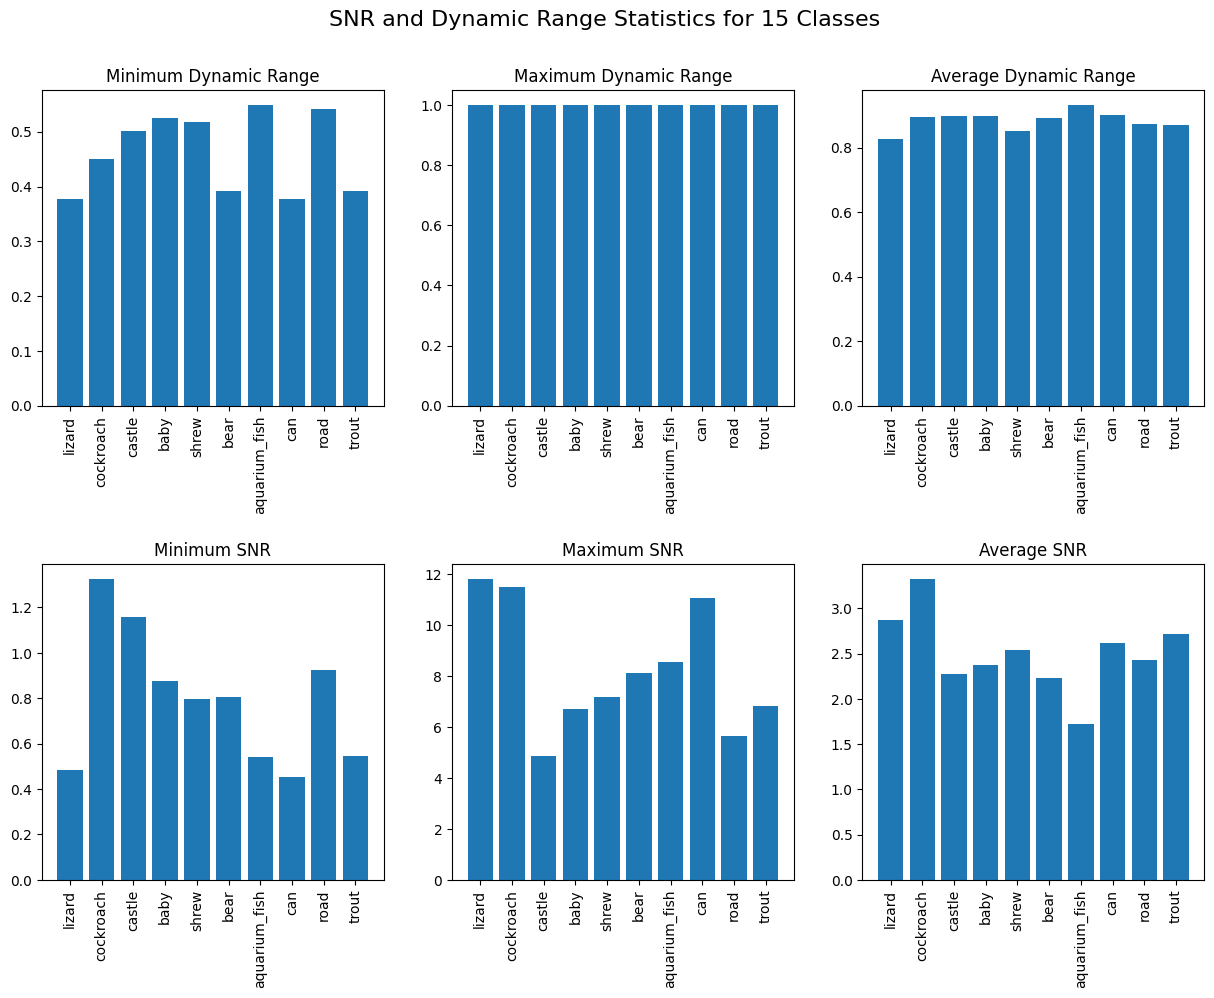

In [ ]:
class_names = np.array(dataset.classes)[selected_classes]
#  dataset.classes[selected_classes]
# Create six subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('SNR and Dynamic Range Statistics for 15 Classes', fontsize=16)

# Plot Minimum Dynamic Range
axs[0, 0].bar(class_names, mini_dynamic_range)
axs[0, 0].set_title('Minimum Dynamic Range')
axs[0, 0].set_xticklabels(class_names, rotation=90)

# Plot Maximum Dynamic Range
axs[0, 1].bar(class_names, max_dynamic_range)
axs[0, 1].set_title('Maximum Dynamic Range')
axs[0, 1].set_xticklabels(class_names, rotation=90)

# Plot Average Dynamic Range
axs[0, 2].bar(class_names, avg_dynamic_range)
axs[0, 2].set_title('Average Dynamic Range')
axs[0, 2].set_xticklabels(class_names, rotation=90)

# Plot Minimum SNR
axs[1, 0].bar(class_names, min_snr)
axs[1, 0].set_title('Minimum SNR')
axs[1, 0].set_xticklabels(class_names, rotation=90)

# Plot Maximum SNR
axs[1, 1].bar(class_names, max_snr)
axs[1, 1].set_title('Maximum SNR')
axs[1, 1].set_xticklabels(class_names, rotation=90)

# Plot Average SNR
axs[1, 2].bar(class_names, avg_snr)
axs[1, 2].set_title('Average SNR')
axs[1, 2].set_xticklabels(class_names, rotation=90)

# Adjust layout
plt.subplots_adjust(top=0.9, hspace=0.5)

# Show the plots
plt.show()

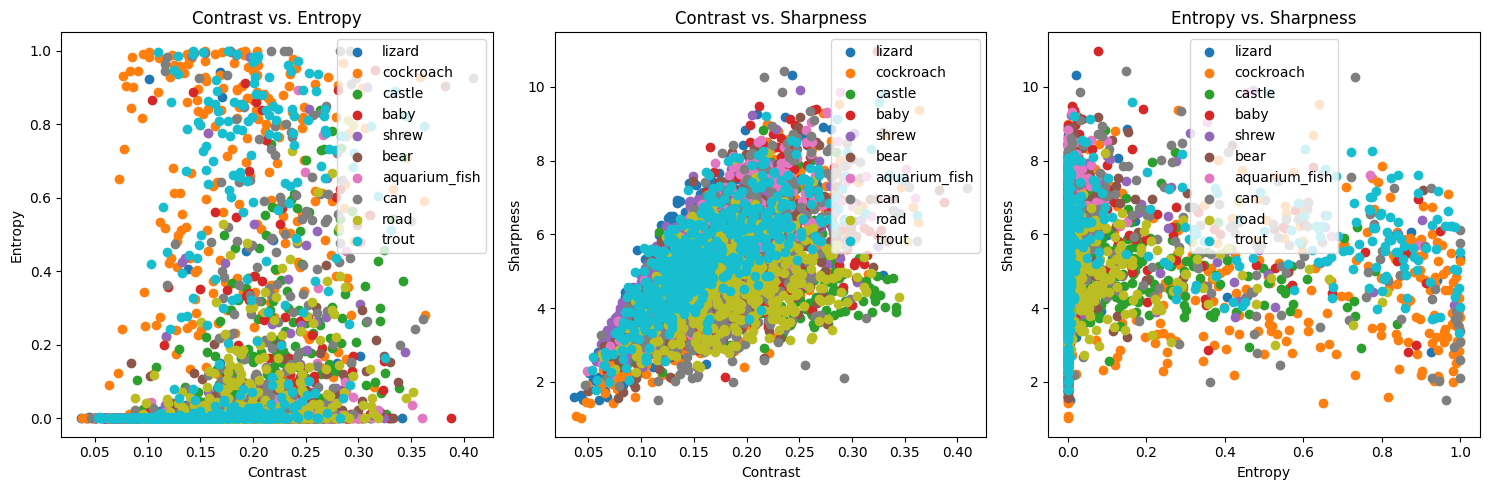

In [ ]:
# Create scatter plots for each feature
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot contrast vs. entropy
for i in range(10):
    features = class_features[i]
    contrast_values = [item[0] for item in features]
    entropy_values = [item[1] for item in features]
    axs[0].scatter(contrast_values, entropy_values, label=class_names[i])

axs[0].set_xlabel('Contrast')
axs[0].set_ylabel('Entropy')
axs[0].set_title('Contrast vs. Entropy')
axs[0].legend()

# Plot contrast vs. sharpness
for i in range(10):
    features = class_features[i]
    contrast_values = [item[0] for item in features]
    sharpness_values = [item[2] for item in features]
    axs[1].scatter(contrast_values, sharpness_values, label=class_names[i])

axs[1].set_xlabel('Contrast')
axs[1].set_ylabel('Sharpness')
axs[1].set_title('Contrast vs. Sharpness')
axs[1].legend()

# Plot entropy vs. sharpness
for i in range(10):
    features = class_features[i]
    entropy_values = [item[1] for item in features]
    sharpness_values = [item[2] for item in features]
    axs[2].scatter(entropy_values, sharpness_values, label=class_names[i])

axs[2].set_xlabel('Entropy')
axs[2].set_ylabel('Sharpness')
axs[2].set_title('Entropy vs. Sharpness')
axs[2].legend()

plt.tight_layout()
plt.show()

**CIFAR100 DATASET:**
I did the same thing to check the dataset. i choose the 10 random classes out of the 100 and plot the graphs. Overall, the contrast, entropy, and sharpness of the images in CIFAR-100 are all good. However, there is some variation between classes. This is because CIFAR-100 is a more challenging dataset than CIFAR-10, as it contains more classes and the classes are more fine-grained.

The variation in contrast, entropy, and sharpness between classes in CIFAR-100 makes it a good dataset for training and evaluating image classification models. A model that can accurately classify images from CIFAR-100 is likely to be able to generalize well to other image classification tasks.

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from models import ResNet18


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])
train_dataset = CIFAR10(root='./data', train=True, download=True, transform=train_transform)
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=2, pin_memory=True)

model = ResNet18(10).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 30

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % 100 == 0:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished training')

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the model on the test images: %d %%' % (100 * correct / total))

torch.save(model.state_dict(), '/content/drive/MyDrive/dataset/selective-synaptic-dampening/ResNet18.pth')

[1,   100] loss: 1.785

[1,   200] loss: 1.498

[1,   300] loss: 1.317

[2,   100] loss: 1.070

[2,   200] loss: 0.993

[2,   300] loss: 0.942

[3,   100] loss: 0.795

[3,   200] loss: 0.788

[3,   300] loss: 0.719

[4,   100] loss: 0.653

[4,   200] loss: 0.644

[4,   300] loss: 0.625

[5,   100] loss: 0.570

[5,   200] loss: 0.548

[5,   300] loss: 0.547

[6,   100] loss: 0.493

[6,   200] loss: 0.482

[6,   300] loss: 0.475

[7,   100] loss: 0.419

[7,   200] loss: 0.434

[7,   300] loss: 0.429

[8,   100] loss: 0.389

[8,   200] loss: 0.392

[8,   300] loss: 0.394

[9,   100] loss: 0.353

[9,   200] loss: 0.363

[9,   300] loss: 0.369

[10,   100] loss: 0.323

[10,   200] loss: 0.333

[10,   300] loss: 0.321

[11,   100] loss: 0.291

[11,   200] loss: 0.314

[11,   300] loss: 0.306

[12,   100] loss: 0.272

[12,   200] loss: 0.287

[12,   300] loss: 0.294

[13,   100] loss: 0.253

[13,   200] loss: 0.267

[13,   300] loss: 0.256

[14,   100] loss: 0.233

[14,   200] loss: 0.245

[14,   300] loss: 0.250

[15,   100] loss: 0.221

[15,   200] loss: 0.228

[15,   300] loss: 0.241

[16,   100] loss: 0.194

[16,   200] loss: 0.215

[16,   300] loss: 0.205

[17,   100] loss: 0.182

[17,   200] loss: 0.199

[17,   300] loss: 0.206

[18,   100] loss: 0.160

[18,   200] loss: 0.174

[18,   300] loss: 0.194

[19,   100] loss: 0.164

[19,   200] loss: 0.163

[19,   300] loss: 0.178

[20,   100] loss: 0.161

[20,   200] loss: 0.158

[20,   300] loss: 0.158

[21,   100] loss: 0.138

[21,   200] loss: 0.143

[21,   300] loss: 0.149

[22,   100] loss: 0.139

[22,   200] loss: 0.133

[22,   300] loss: 0.146

[23,   100] loss: 0.129

[23,   200] loss: 0.122

[23,   300] loss: 0.137

[24,   100] loss: 0.119

[24,   200] loss: 0.128

[24,   300] loss: 0.120

[25,   100] loss: 0.102

[25,   200] loss: 0.123

[25,   300] loss: 0.116

[26,   100] loss: 0.102

[26,   200] loss: 0.096

[26,   300] loss: 0.116

[27,   100] loss: 0.089

[27,   200] loss: 0.099

[27,   300] loss: 0.118

[28,   100] loss: 0.084

[28,   200] loss: 0.090

[28,   300] loss: 0.110

[29,   100] loss: 0.073

[29,   200] loss: 0.078

[29,   300] loss: 0.100

[30,   100] loss: 0.080

[30,   200] loss: 0.080

[30,   300] loss: 0.087

Finished training
Accuracy of the model on the test images: 89 %

In [ ]:
DEVICE=1
seed=2

forget_perc=0.00165 # 100 samples
dataset='Cifar10'
n_classes=10
weight_path= "/content/drive/MyDrive/dataset/selective-synaptic-dampening/ResNet18.pth" # "/content/resnet18.pt"
!python forget_random_main.py -net ResNet18 -dataset $dataset -classes $n_classes -gpu -method baseline -forget_perc $forget_perc -weight_path $weight_path -seed $seed


**RESULTS:**


Metric:


Df:	98.79518
MIA:	0.80723
MethodTime:	261.35866
RetainTestAcc:	90.65467
TestAcc:	90.65467
ZRF:	0.62089

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import wandb
import torch.nn as nn
from models import ResNet18

def accuracy(outputs, labels):
    _, preds = torch.max(outputs.data, 1)
    return torch.sum(preds == labels).item() / len(labels)


# Initialize W&B
wandb.init(project='cifar100-classification', name='resnet18')

# Define the device to use for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the CIFAR100 dataset
wandb.log({
  'status': 'Loading CIFAR100 dataset'
})
train_dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False, transform=transforms.ToTensor())

# Create data loaders
wandb.log({
  'status': 'Creating data loaders'
})
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load the pre-trained ResNet18 model
wandb.log({
  'status': 'Loading pre-trained ResNet18 model'
})
model = ResNet18(100).to(device)

# Freeze the layers of the model so that they are not updated during training
# for param in model.parameters():
#     param.requires_grad = False

# Add a new layer to the model to classify the output to 100 classes
# wandb.log({
#   'status': 'Adding new classification layer'
# })
# model.fc = nn.Linear(512, 100)

# Define the optimizer and loss function
wandb.log({
  'status': 'Defining optimizer and loss function'
})
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)   #

# Train the model for 10 epochs
wandb.log({
  'status': 'Starting transfer learning'
})
for epoch in range(13):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass, calculate loss and backpropagate
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        # Update the weights
        optimizer.step()

        # Calculate running loss
        running_loss += loss.item()

        # Log training results to W&B
        wandb.log({
          'epoch': epoch + 1,
          'train_loss': running_loss / 100,
          'train_acc': accuracy(outputs, labels)
        })

        # Print loss every 100 batches
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

# Save the trained model
wandb.log({
  'status': 'Saving trained model'
})
torch.save(model.state_dict(), 'resnet18_cifar100_transfer_learned.pth')

# Evaluate the model on test data
wandb.log({
  'status': 'Evaluating model on test data'
})
# test_loss, test_acc = model.evaluate(test_loader)
# wandb.log({
#   'test_loss': test_loss,
#   'test_acc': test_acc
# })
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
wandb.log({
  'test_acc': correct / total
})
print('Accuracy of the model on the test images: %d %%' % (100 * correct / total))

# Finish the W&B run
wandb.finish()

**Trainig Accuracy:**

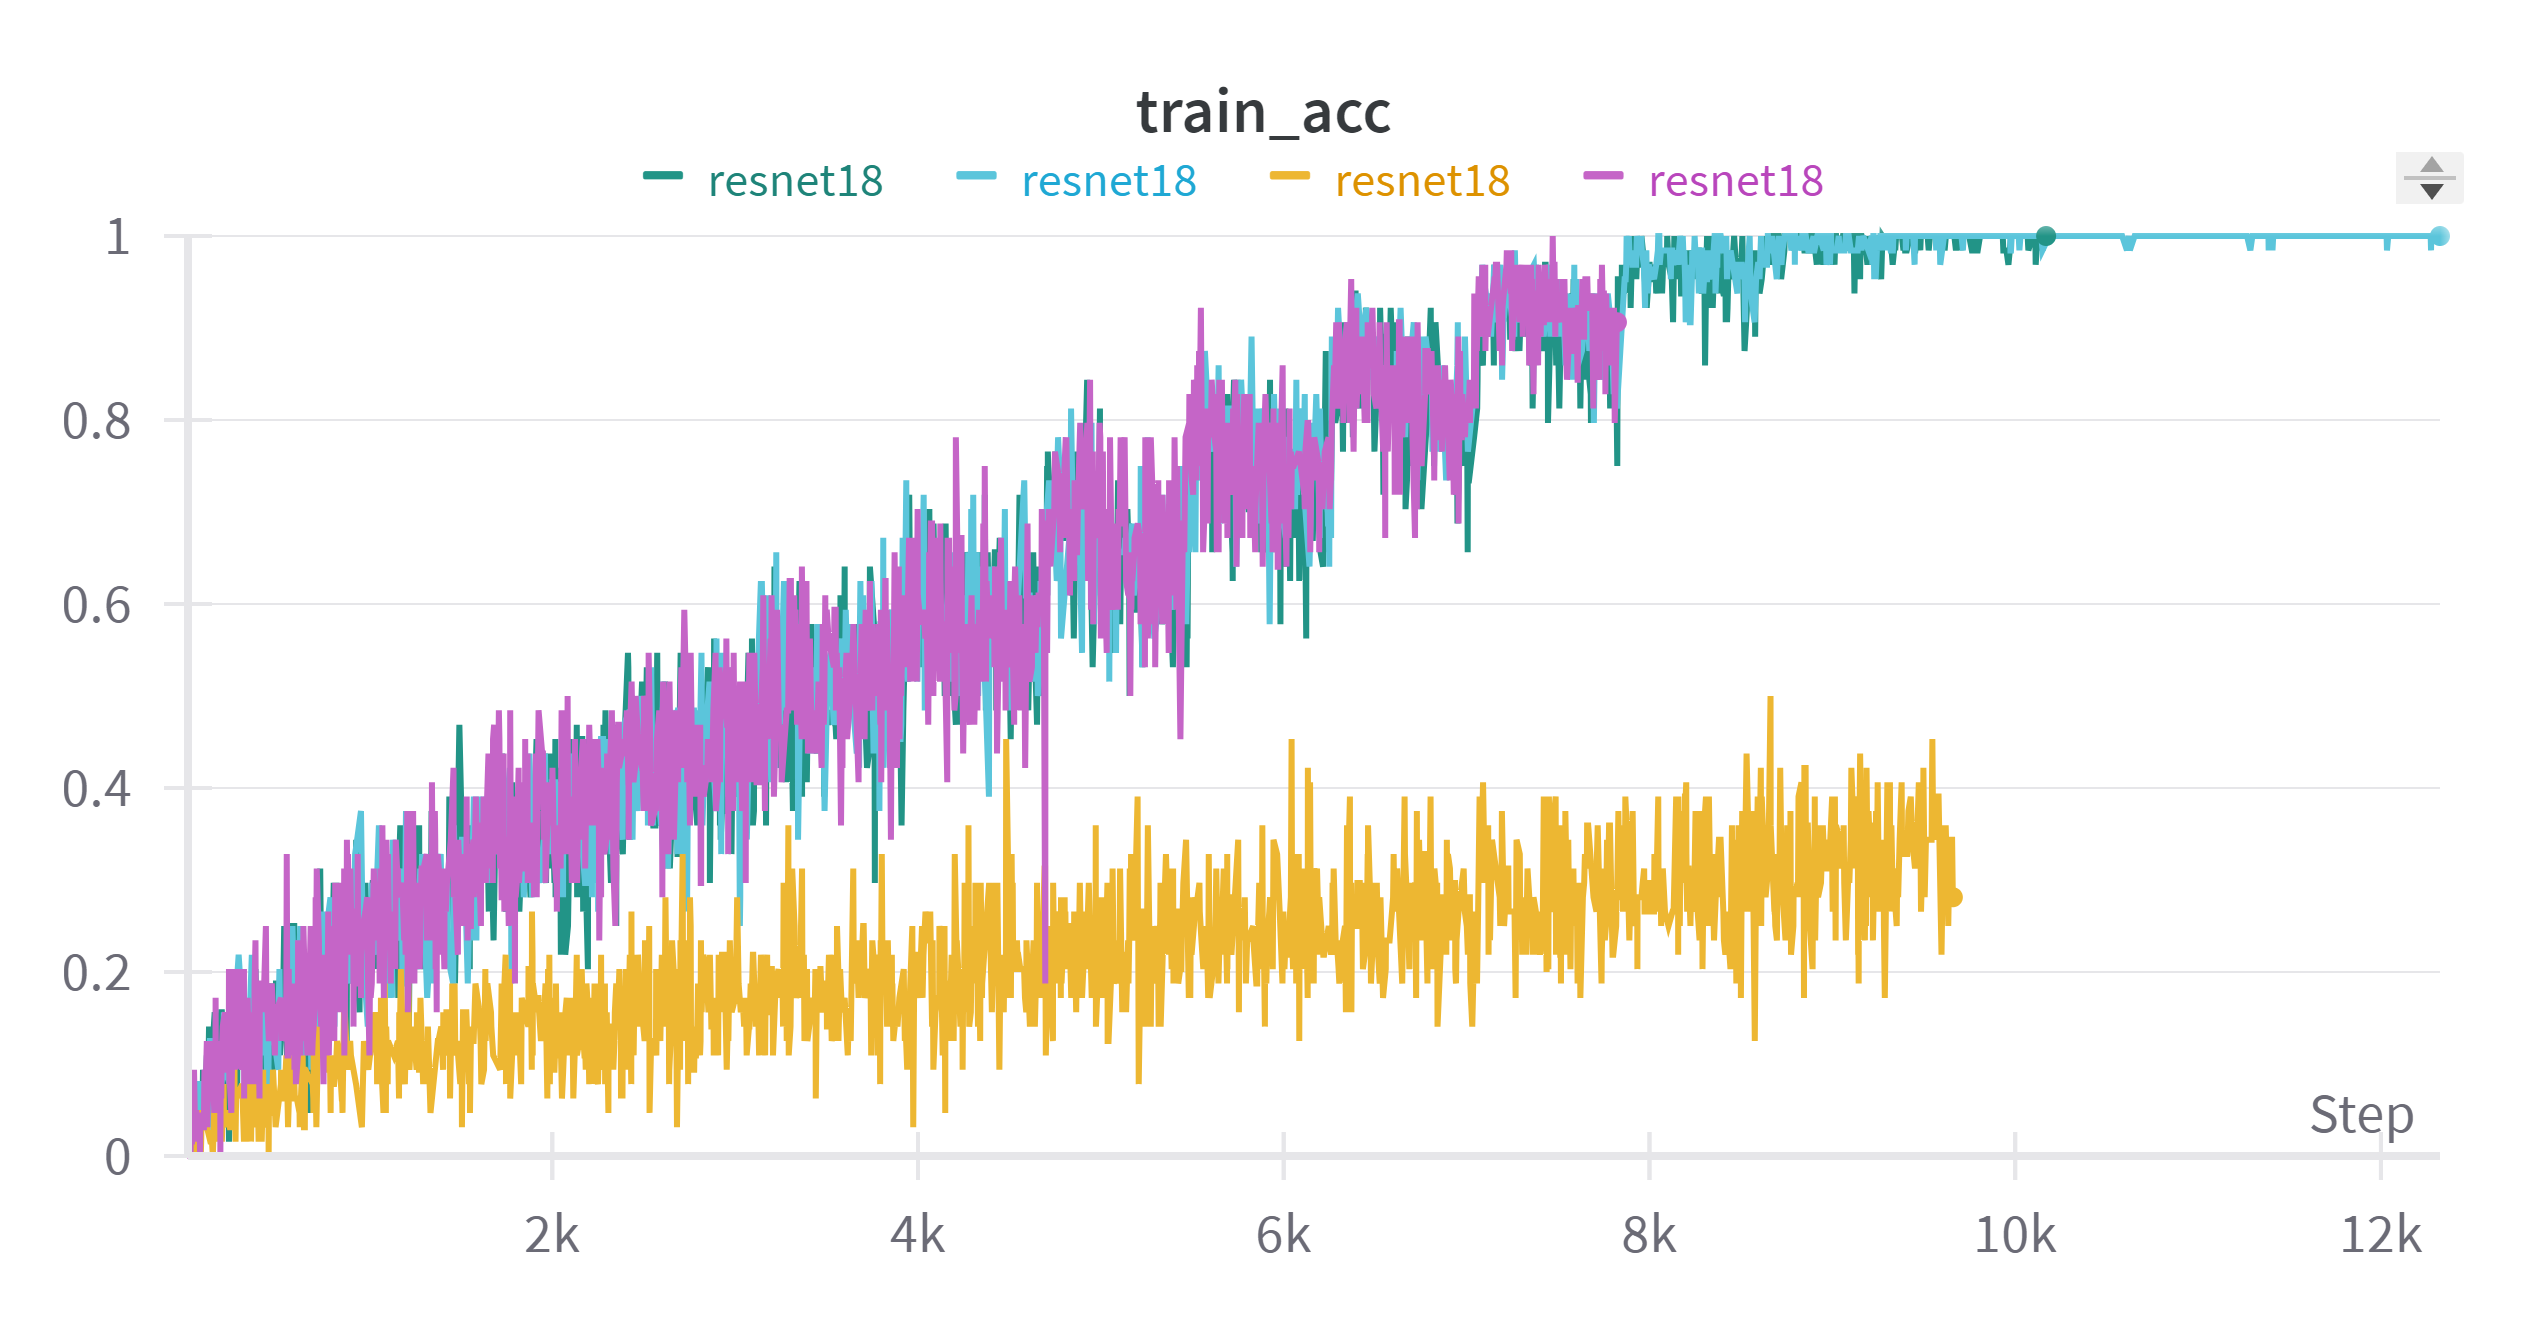



**Training Loss:**

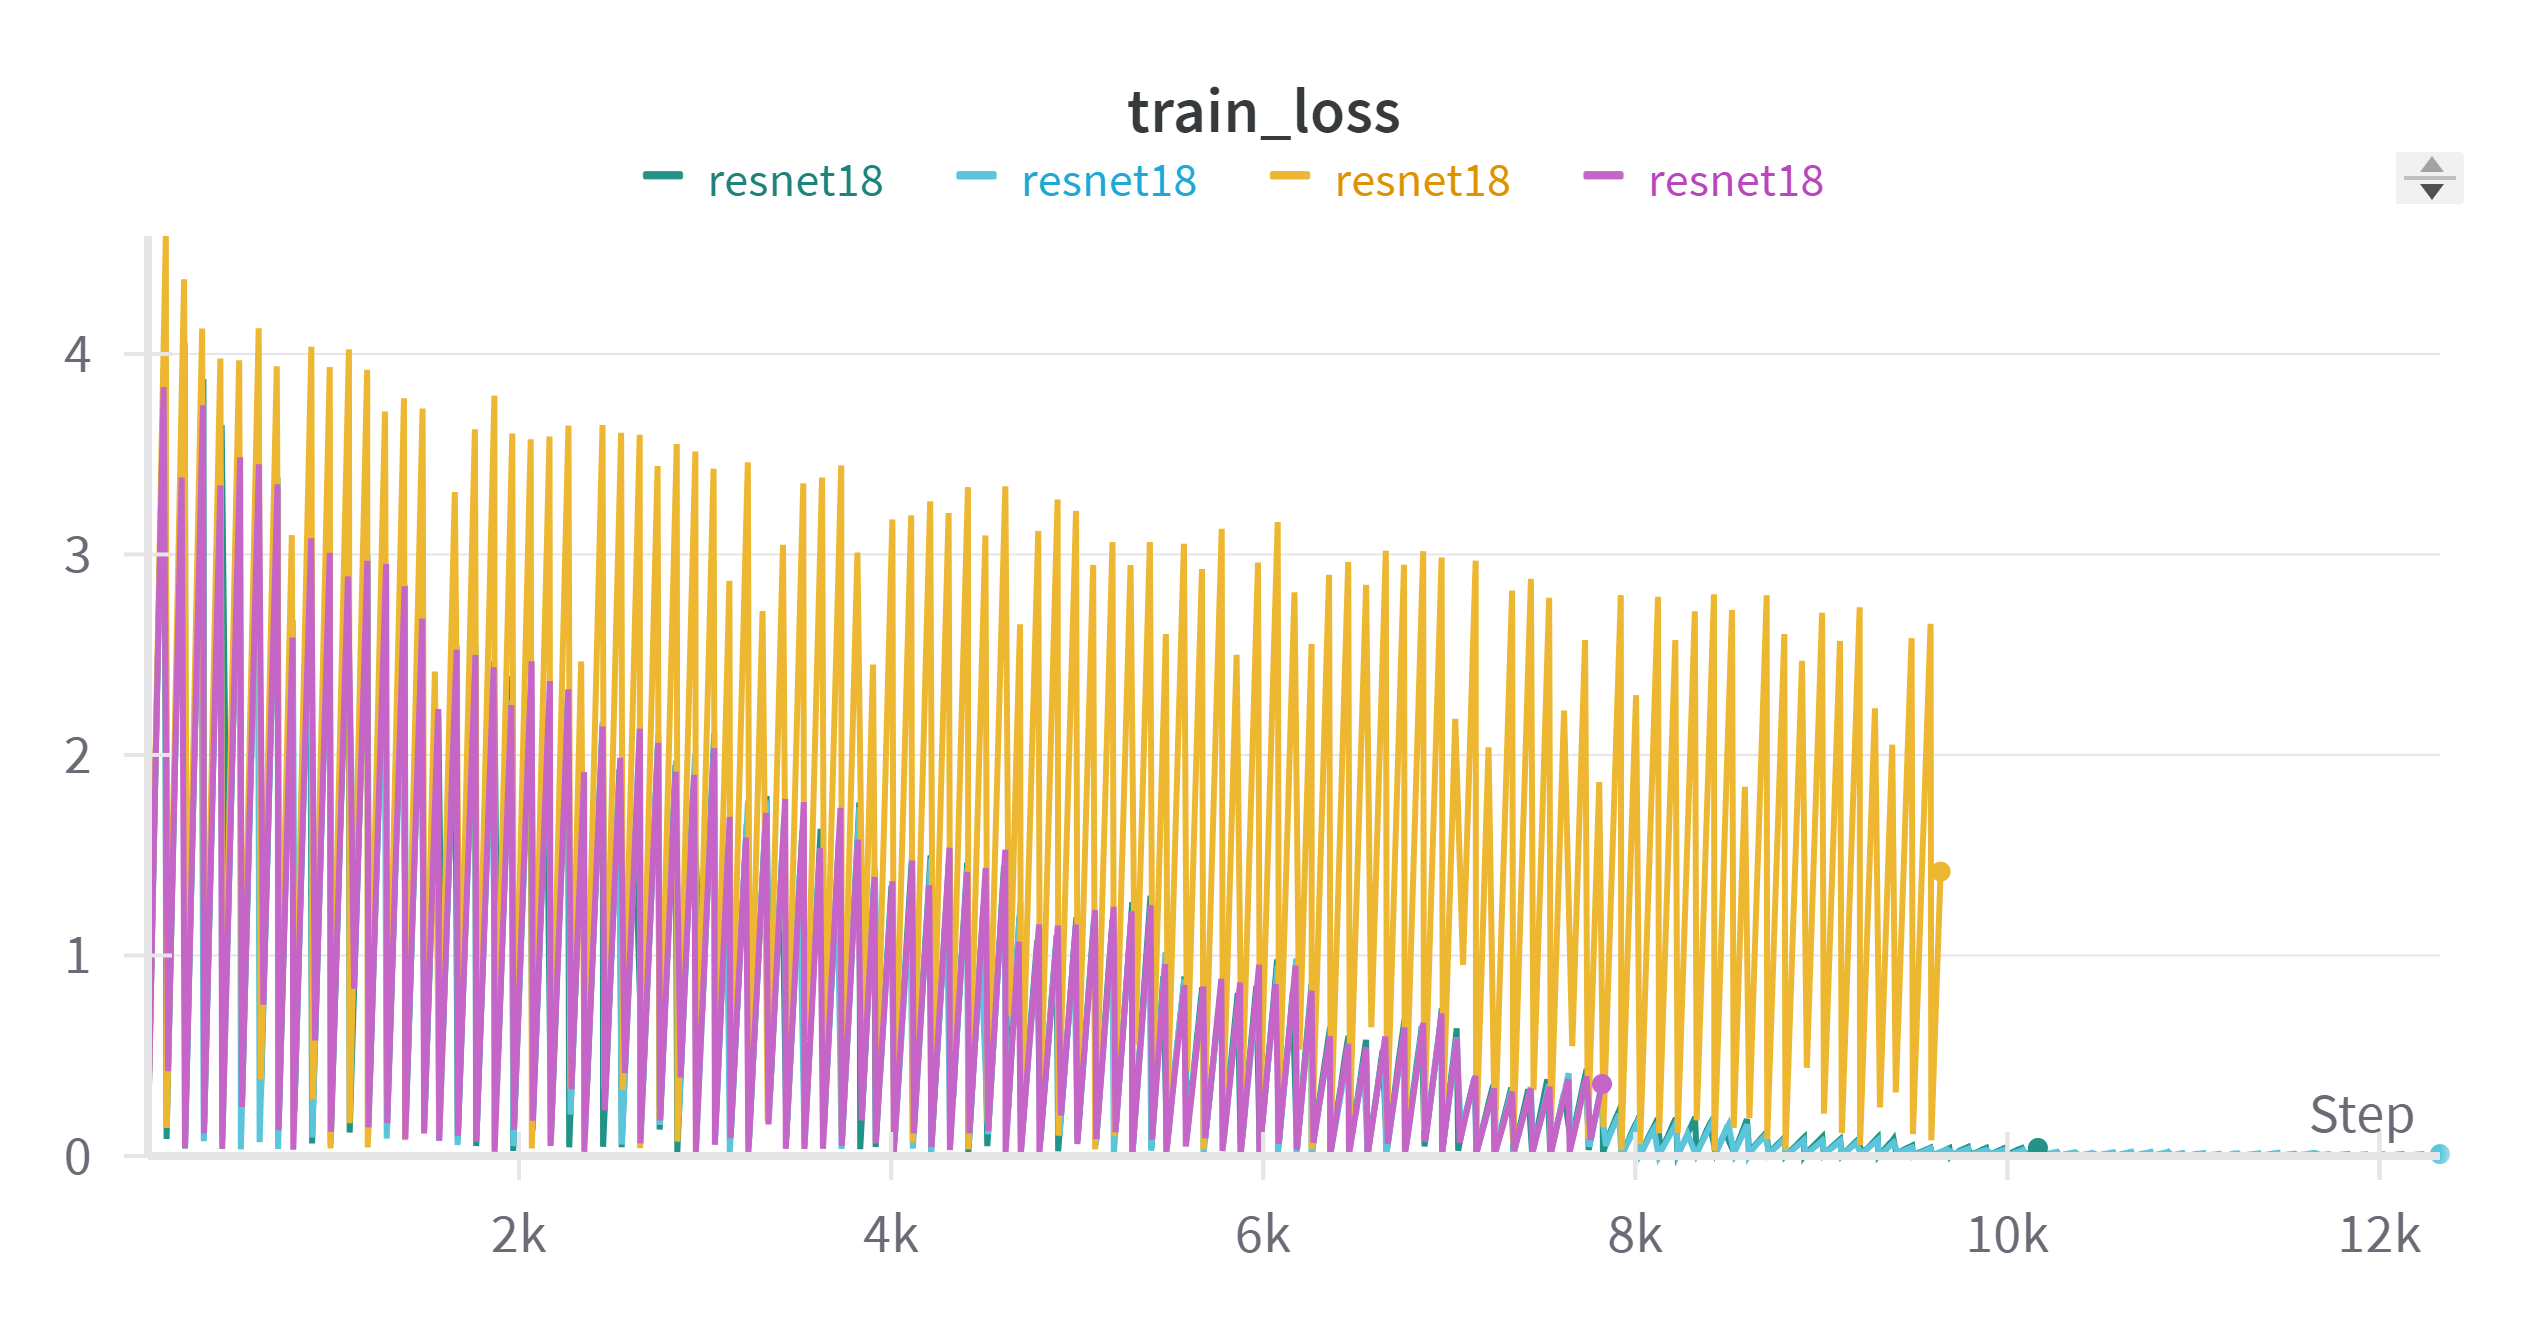

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
from torchvision.datasets import CIFAR10
import wandb
from models import ViT


def accuracy(outputs, labels):
    _, preds = torch.max(outputs.data, 1)
    return torch.sum(preds == labels).item() / len(labels)


# Initialize W&B
wandb.init(project='cifar10-classification', name='vit-training')


# Define the device to use for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Load the CIFAR-10 dataset
wandb.log({
    'status': 'Loading CIFAR-10 dataset'
})
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Resize((224, 224))]))
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transforms.Compose([transforms.ToTensor(), transforms.Resize((224, 224))]))


# Create data loaders
wandb.log({
    'status': 'Creating data loaders'
})
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True) #64
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False) #32


# Load the ViT model
wandb.log({
    'status': 'Loading ViT model'
})
model = ViT(num_classes=10).to(device)


# Define the optimizer and loss function
wandb.log({
    'status': 'Defining optimizer and loss function'
})
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001 )


# Train the model for 10 epochs
wandb.log({
    'status': 'Starting training'
})
for epoch in range(10):
    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)


        # Zero the gradients
        optimizer.zero_grad()


        # Forward pass, calculate loss and backpropagate
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()


        # Update the weights
        optimizer.step()


        # Calculate running loss
        running_loss += loss.item()


        # Log training results to W&B
        wandb.log({
            'epoch': epoch + 1,
            'train_loss': running_loss / 100,
            'train_acc': accuracy(outputs, labels)
        })


        # Print loss every 100 batches
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
            torch.save(model.state_dict(), f'vit_cifar10_checkpoint_{epoch}_same_batch.pth')


# Save the trained model
wandb.log({
    'status': 'Saving trained model'
})
torch.save(model.state_dict(), 'vit_cifar10.pth')


# Evaluate the model on test data
wandb.log({
    'status': 'Evaluating model on test data'
})
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
wandb.log({
  'test_acc': correct / total
})
print('Accuracy of the model on the test images: %d %%' % (100 * correct / total))

**Training Accuracy:**

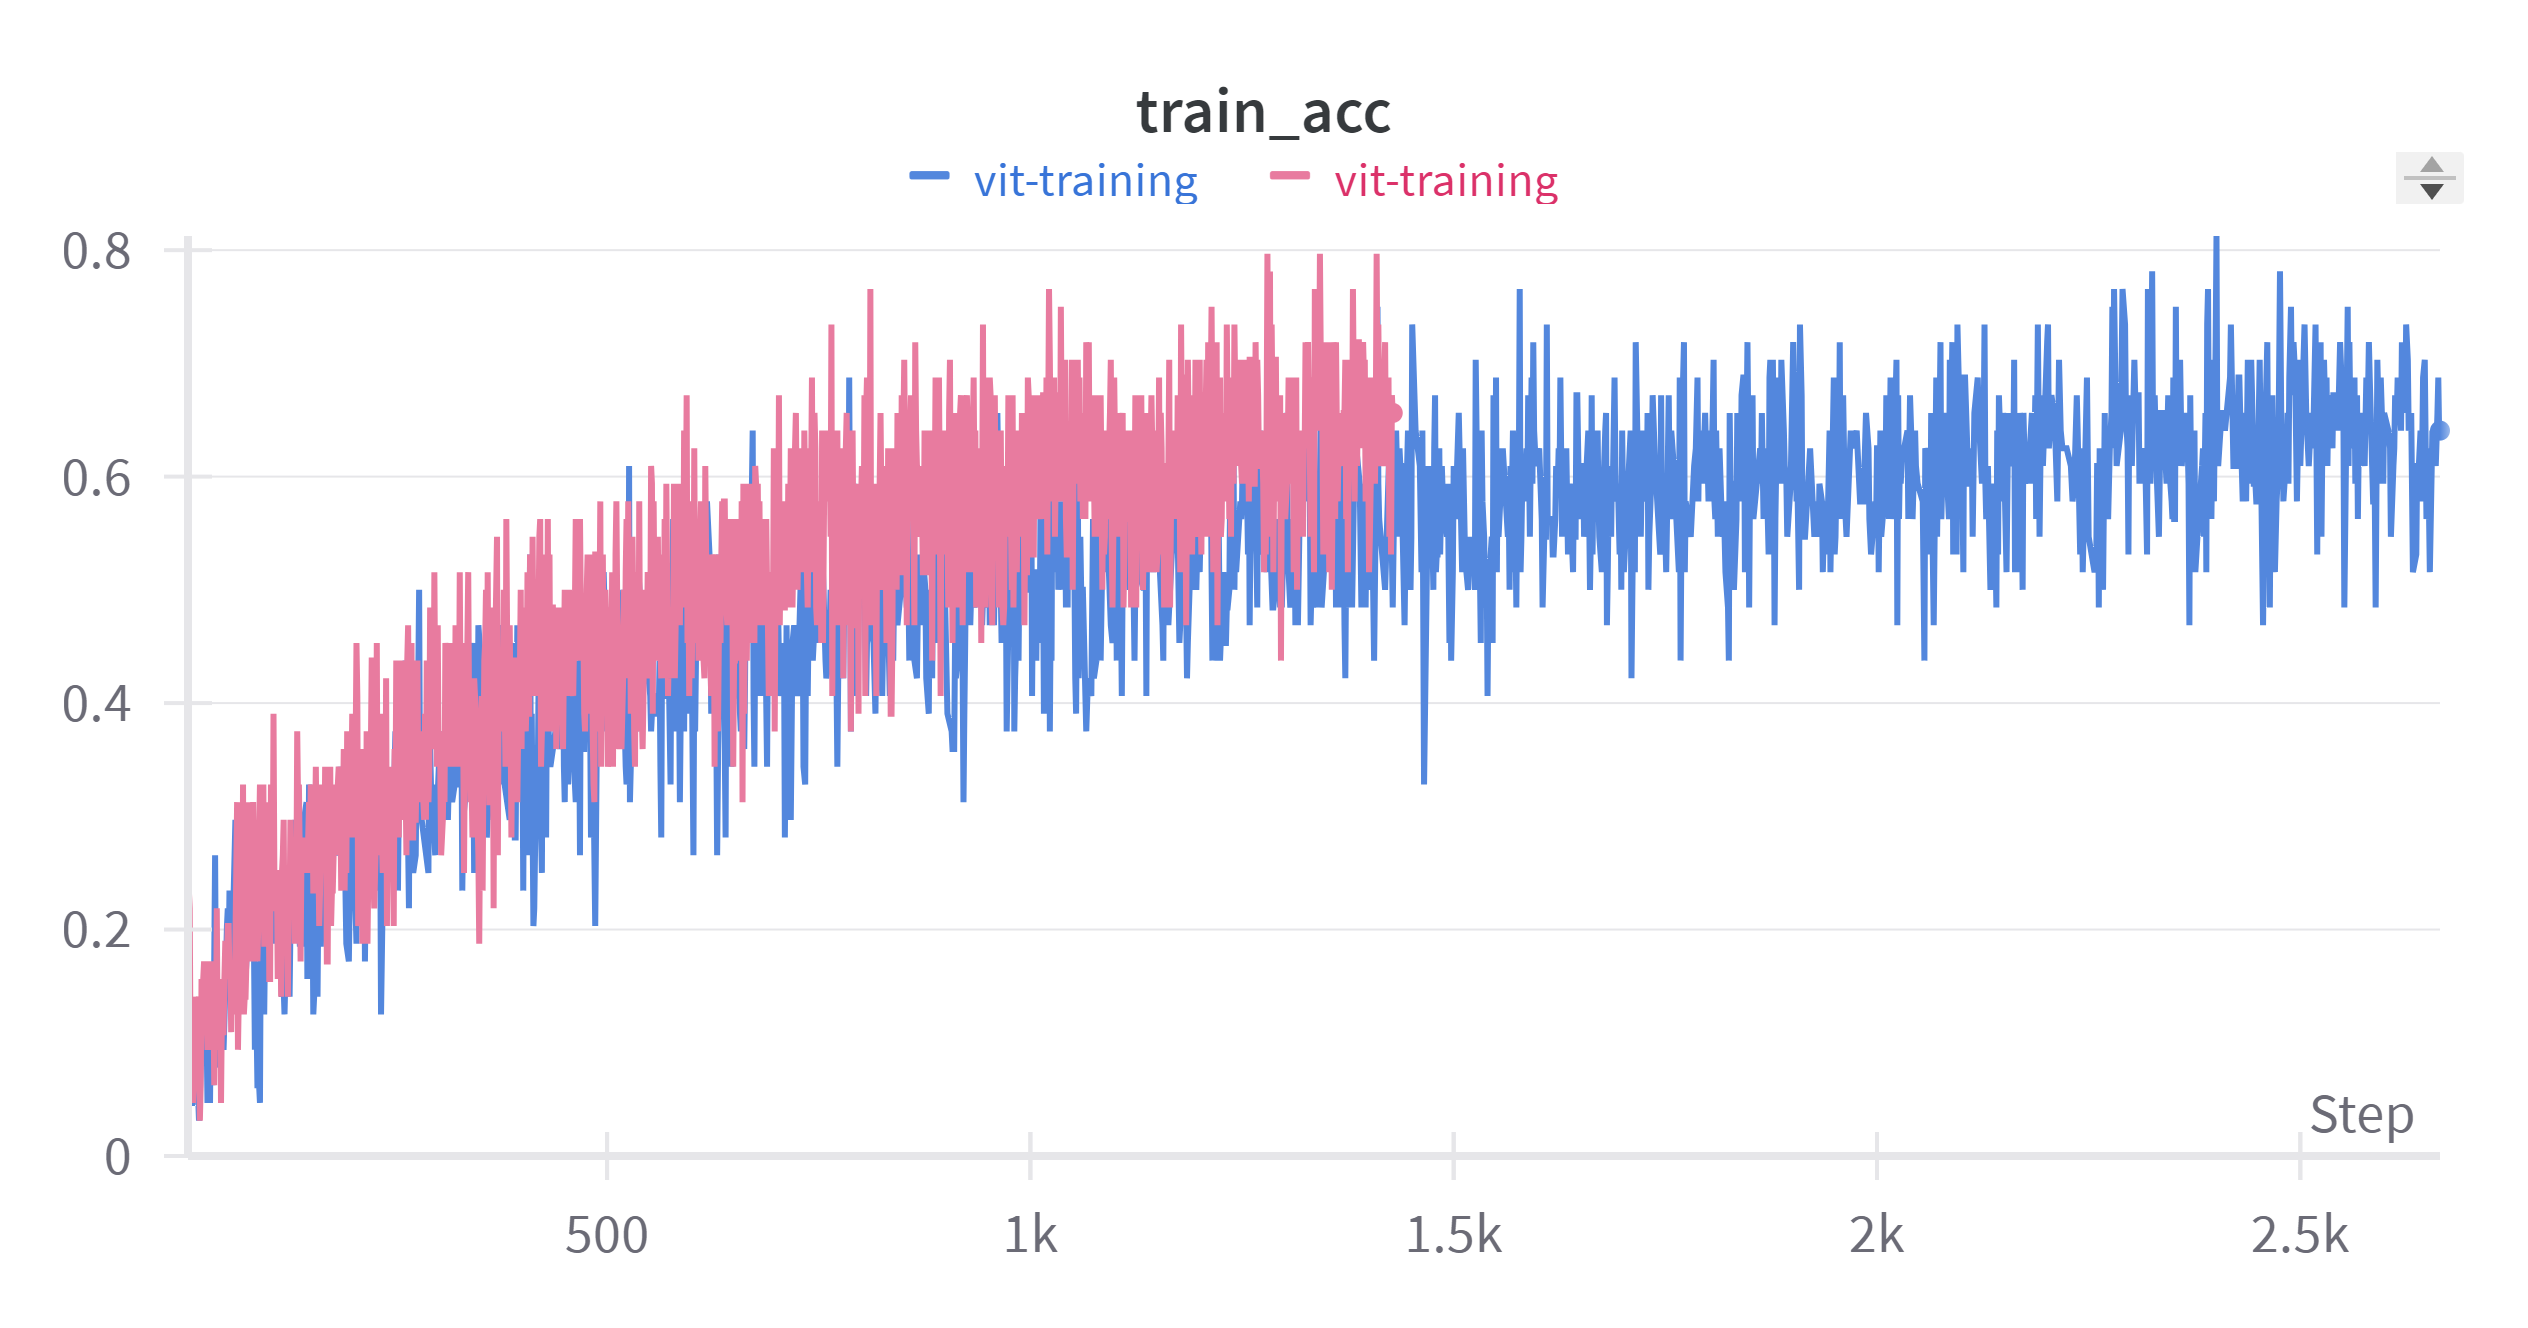

**Training Loss:**

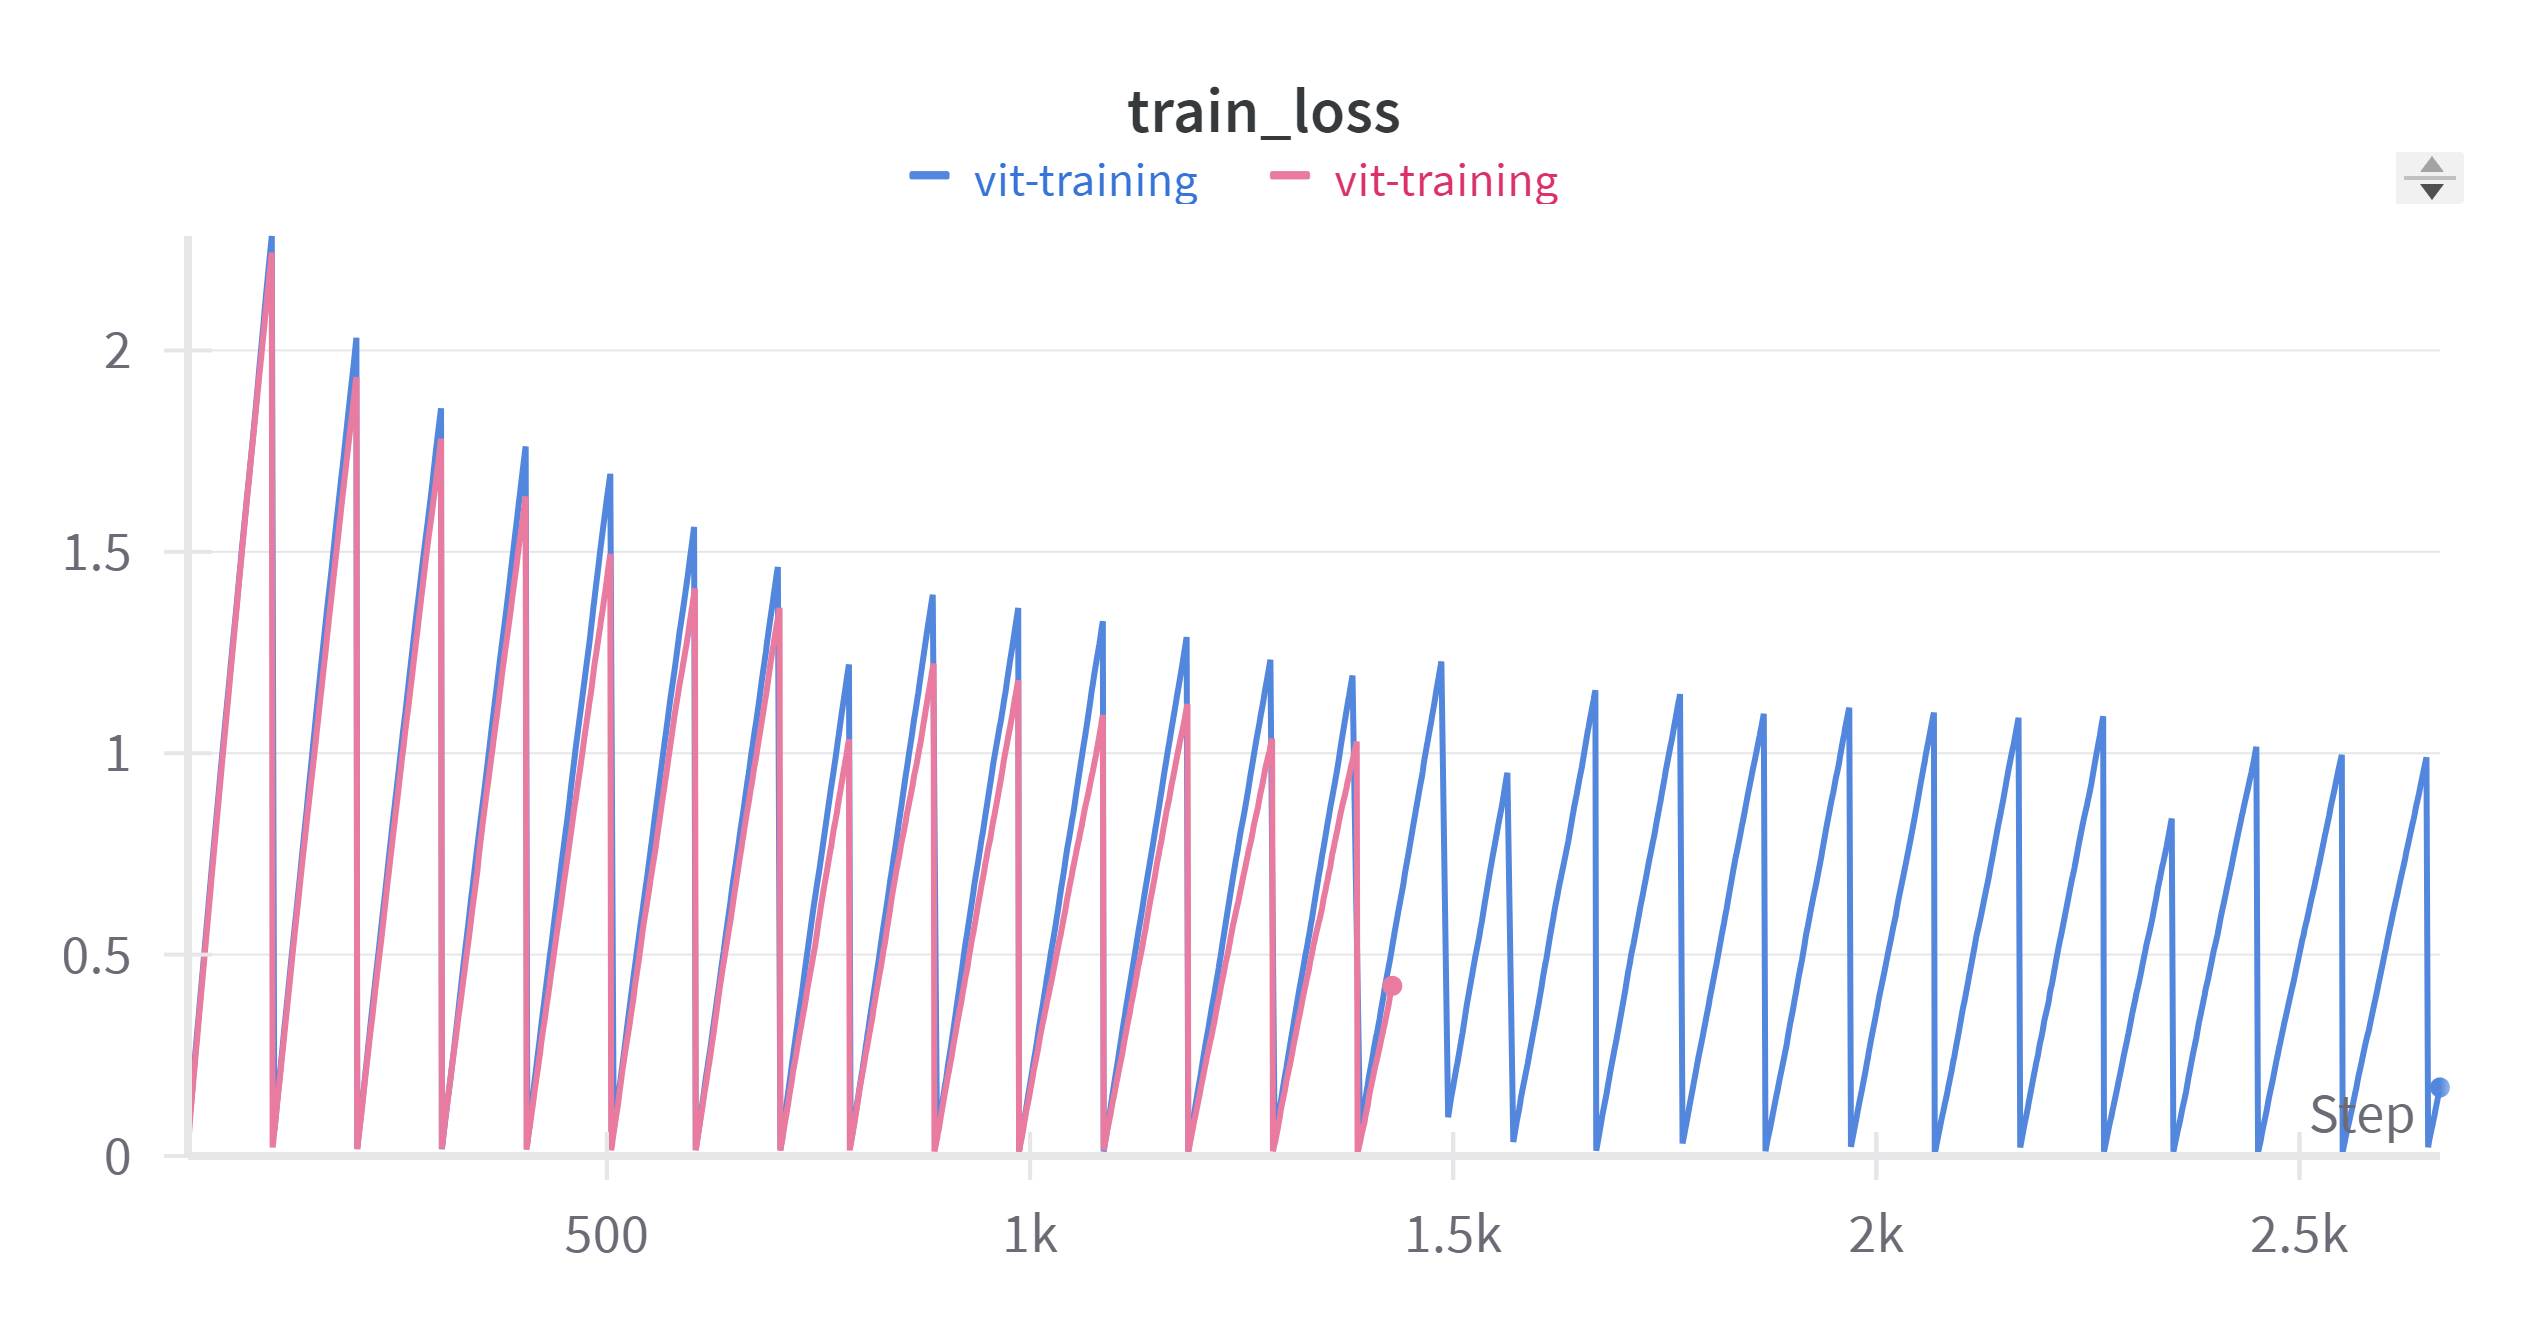

**Analysis:**

cleary the model is over fitting i need to do data augmentaion and try some regularization technique to correct this and save the models.

**Next Steps:**

Apply SSD to the trained ResNet and ViT models: For each dataset, apply SSD to the trained ResNet and ViT models. This involves identifying and dampening the synaptic connections in the models that are disproportionately important for sensitive data.

Evaluate the effectiveness of SSD on CIFAR-10:

a. Data Removal Effectiveness: Analyze the extent to which SSD has removed the influence of specific user images on CIFAR-10. Examine the models' predictions for images that were removed from the training data. A significant decrease in the models' ability to identify and classify these images indicates effective data removal.

b. Performance Comparison: Compare the performance of the original ResNet and ViT models with the SSD-unlearned models on a CIFAR-10 validation dataset. This helps determine if the unlearning process has significantly impacted the models' accuracy on general image recognition tasks.

c. Feature Importance Analysis: Utilize feature importance metrics, such as the Dr. DF matrix, to assess the impact of SSD on the models' reliance on sensitive features. A reduction in the importance of sensitive features indicates that SSD has effectively removed their influence on the models' predictions.

Evaluate the effectiveness of SSD on CIFAR-100:

a. Data Removal Effectiveness: Analyze the extent to which SSD has removed the influence of specific user images on CIFAR-100. Examine the models' predictions for images that were removed from the training data. A significant decrease in the models' ability to identify and classify these images indicates effective data removal.

b. Performance Comparison: Compare the performance of the original ResNet and ViT models with the SSD-unlearned models on a CIFAR-100 validation dataset. This helps determine if the unlearning process has significantly impacted the models' accuracy on general image recognition tasks.

c. Feature Importance Analysis: Utilize feature importance metrics, such as the Dr. DF matrix, to assess the impact of SSD on the models' reliance on sensitive features. A reduction in the importance of sensitive features indicates that SSD has effectively removed their influence on the models' predictions.

Compare the effectiveness of SSD across ResNet and ViT models: Compare the data removal effectiveness, performance impact, and feature importance analysis results for both ResNet and ViT models on both CIFAR-10 and CIFAR-100 datasets. This provides insights into the relative performance of SSD on different model architectures and datasets.

**FROM THE PREVIOUS MILESTONE**

To stop the overfitting I tried data augmentation which improved the accuracy but not much so I tried weight decay technic that also didn't work significantly.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import wandb
import torch.nn as nn
from src.models import ViT

def accuracy(outputs, labels):
    _, preds = torch.max(outputs.data, 1)
    return torch.sum(preds == labels).item() / len(labels)

api_key = "afb8538b339f2adb96b49a5aa783f2ebc55b5a48"
wandb.login(key=api_key)
# Initialize W&B
wandb.init(project='cifar100-classification', name='Vision Transformer')

# Define the device to use for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Define data transformations
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    transforms.Resize((224, 224)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    transforms.Resize((224, 224)),
])

# Load the CIFAR100 dataset
wandb.log({
  'status': 'Loading CIFAR100 dataset'
})
train_dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False, transform=transform_test)

# Create data loaders
wandb.log({
  'status': 'Creating data loaders'
})
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Load the pre-trained ResNet18 model
wandb.log({
  'status': 'Loading ViT model'
})
model =  ViT(num_classes=100).to(device)

checkpoint = torch.load(r"/home/holistic/Desktop/machine unlearn/VIT_cifar100_checkpoint26.pth")
model.load_state_dict(checkpoint)
# Define the optimizer and loss function
wandb.log({
  'status': 'Defining optimizer and loss function'
})
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.0001 )   #

# Train the model for 10 epochs
wandb.log({
  'status': 'Starting transfer learning'
})

start_epoch = 20+1
for epoch in range(start_epoch,60):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass, calculate loss and backpropagate
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        # Update the weights
        optimizer.step()

        # Calculate running loss
        running_loss += loss.item()

        # Log training results to W&B
        wandb.log({
          'epoch': epoch + 1,
          'train_loss': running_loss / 100,
          'train_acc': accuracy(outputs, labels)
        })

        # Print loss every 100 batches
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

    if epoch%5==0:
        torch.save(model.state_dict(), f'VIT_cifar100_checkpoint{epoch + 1}_weight_decay.pth')

# Save the trained model
wandb.log({
  'status': 'Saving trained model'
})
torch.save(model.state_dict(), f'VIT_cifar100{epoch}_weight_decay.pth')

# Evaluate the model on test data
wandb.log({
  'status': 'Evaluating model on test data'
})
# test_loss, test_acc = model.evaluate(test_loader)
# wandb.log({
#   'test_loss': test_loss,
#   'test_acc': test_acc
# })
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
wandb.log({
  'test_acc': correct / total
})
print('Accuracy of the model on the test images: %d %%' % (100 * correct / total))

# Finish the W&B run
wandb.finish()

following are the graphs of training from the different checkpoints as could not able to train it from the 0 to 60 epoch in one go.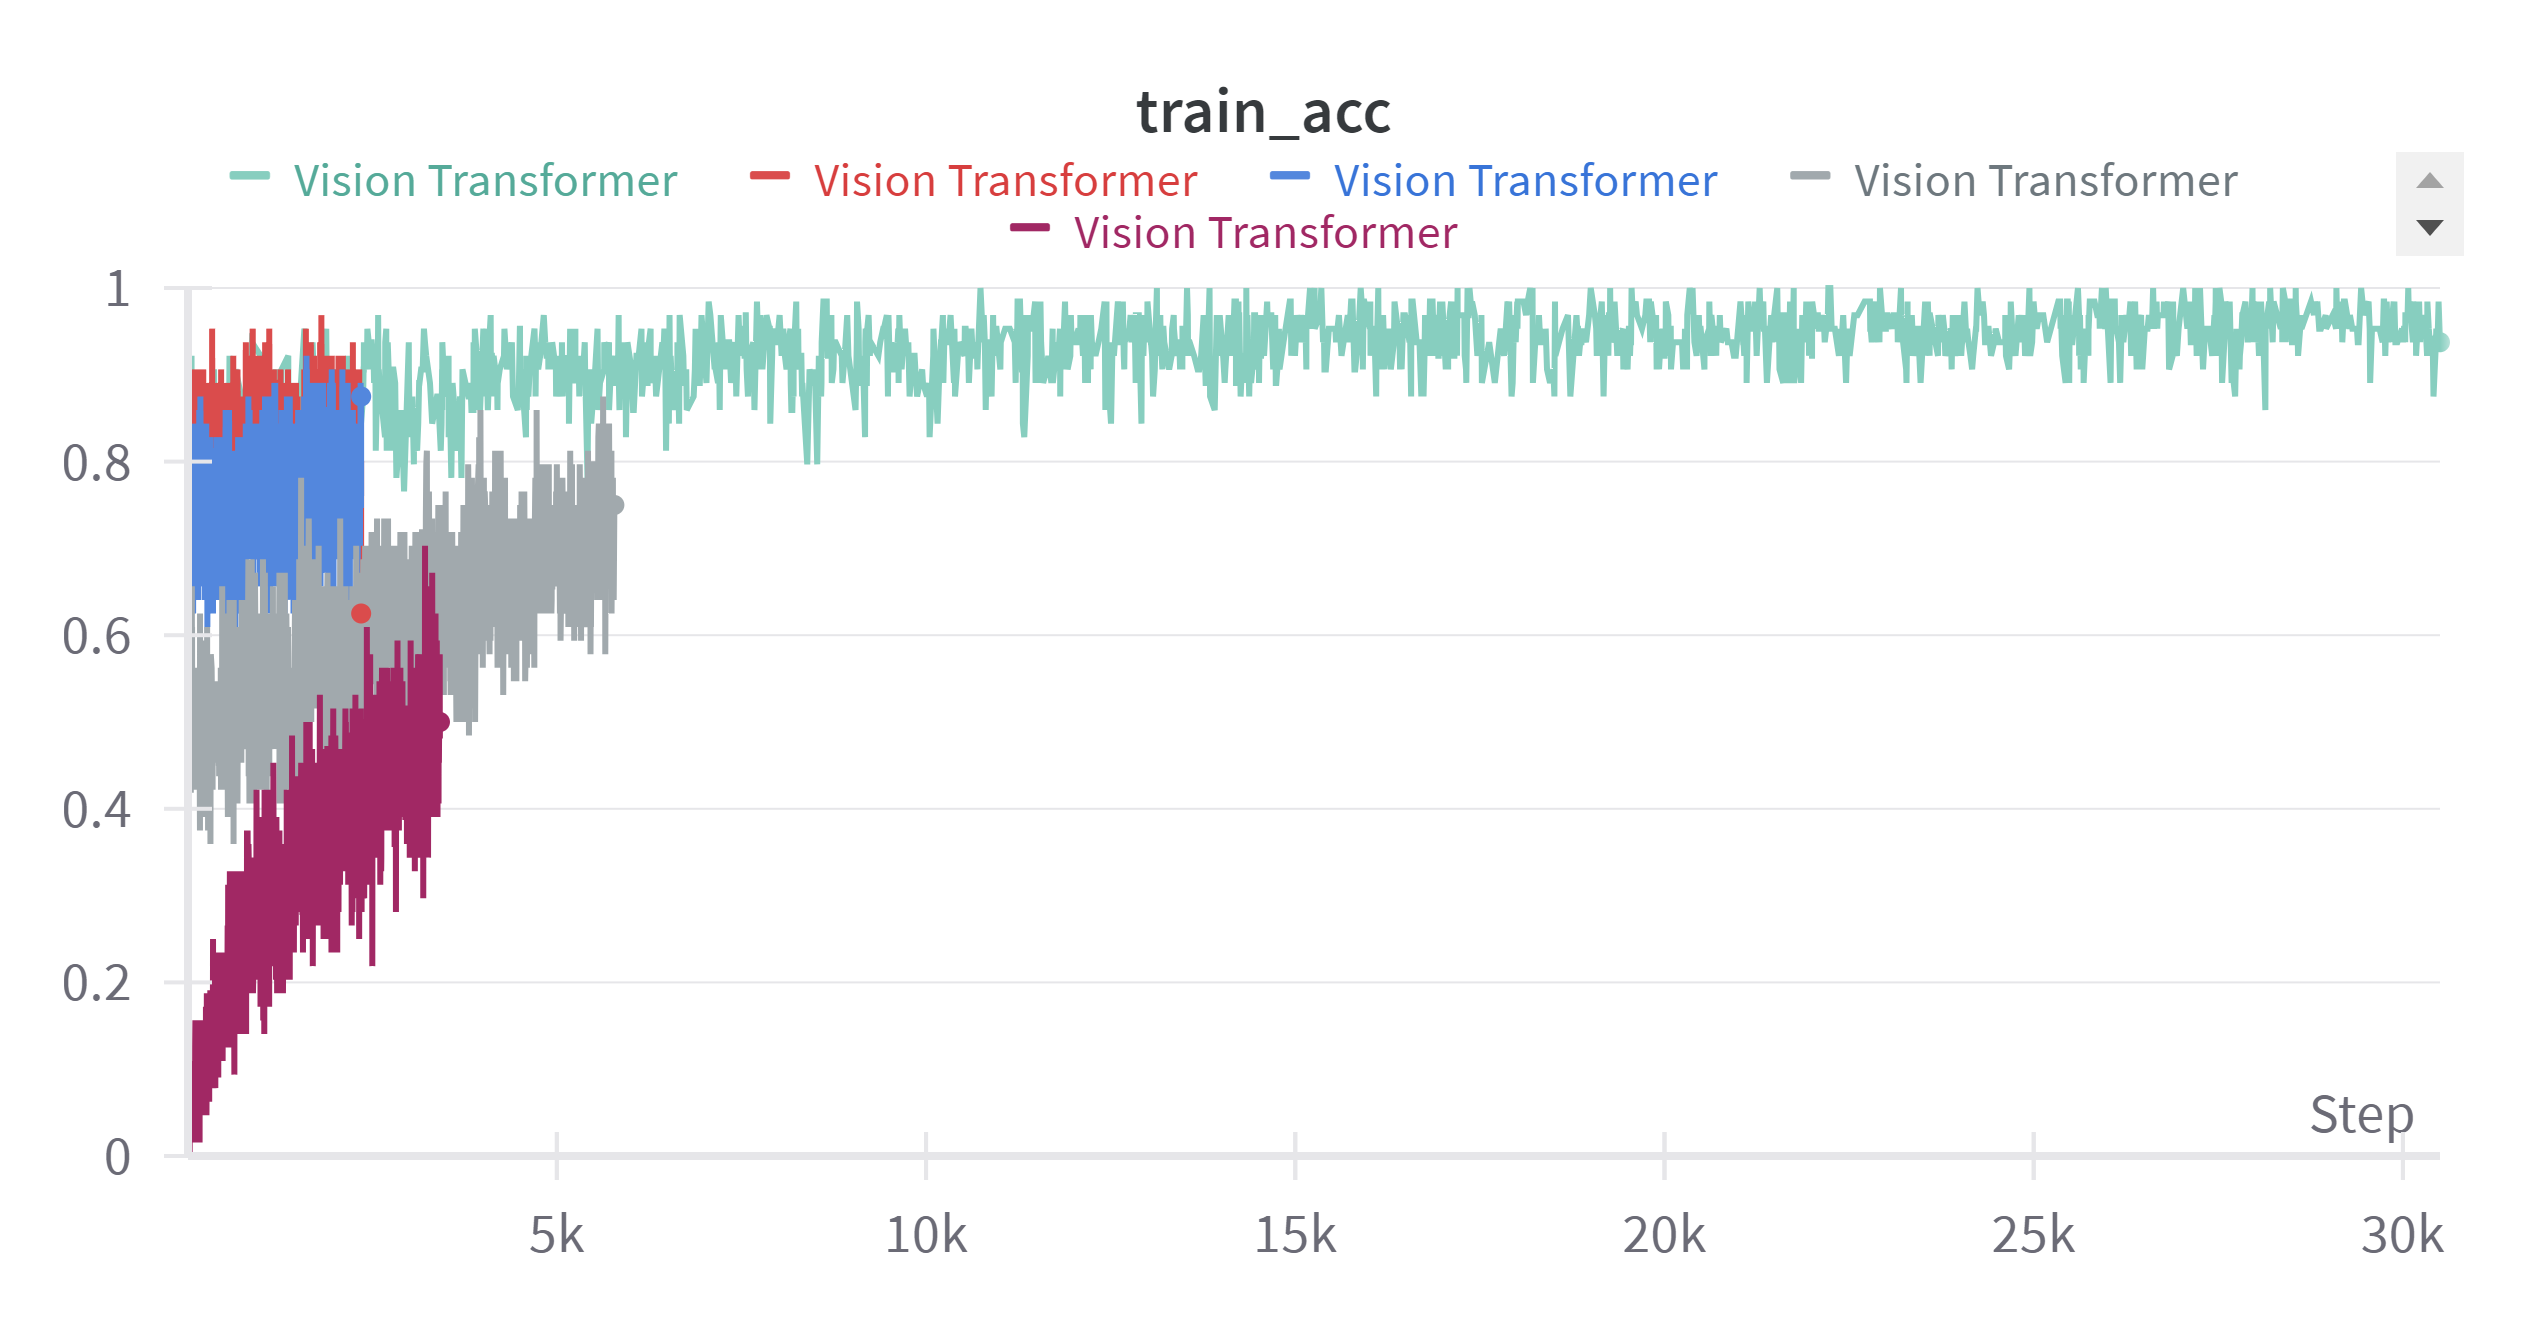

**RESNET18 CiFar100 Graphs:**

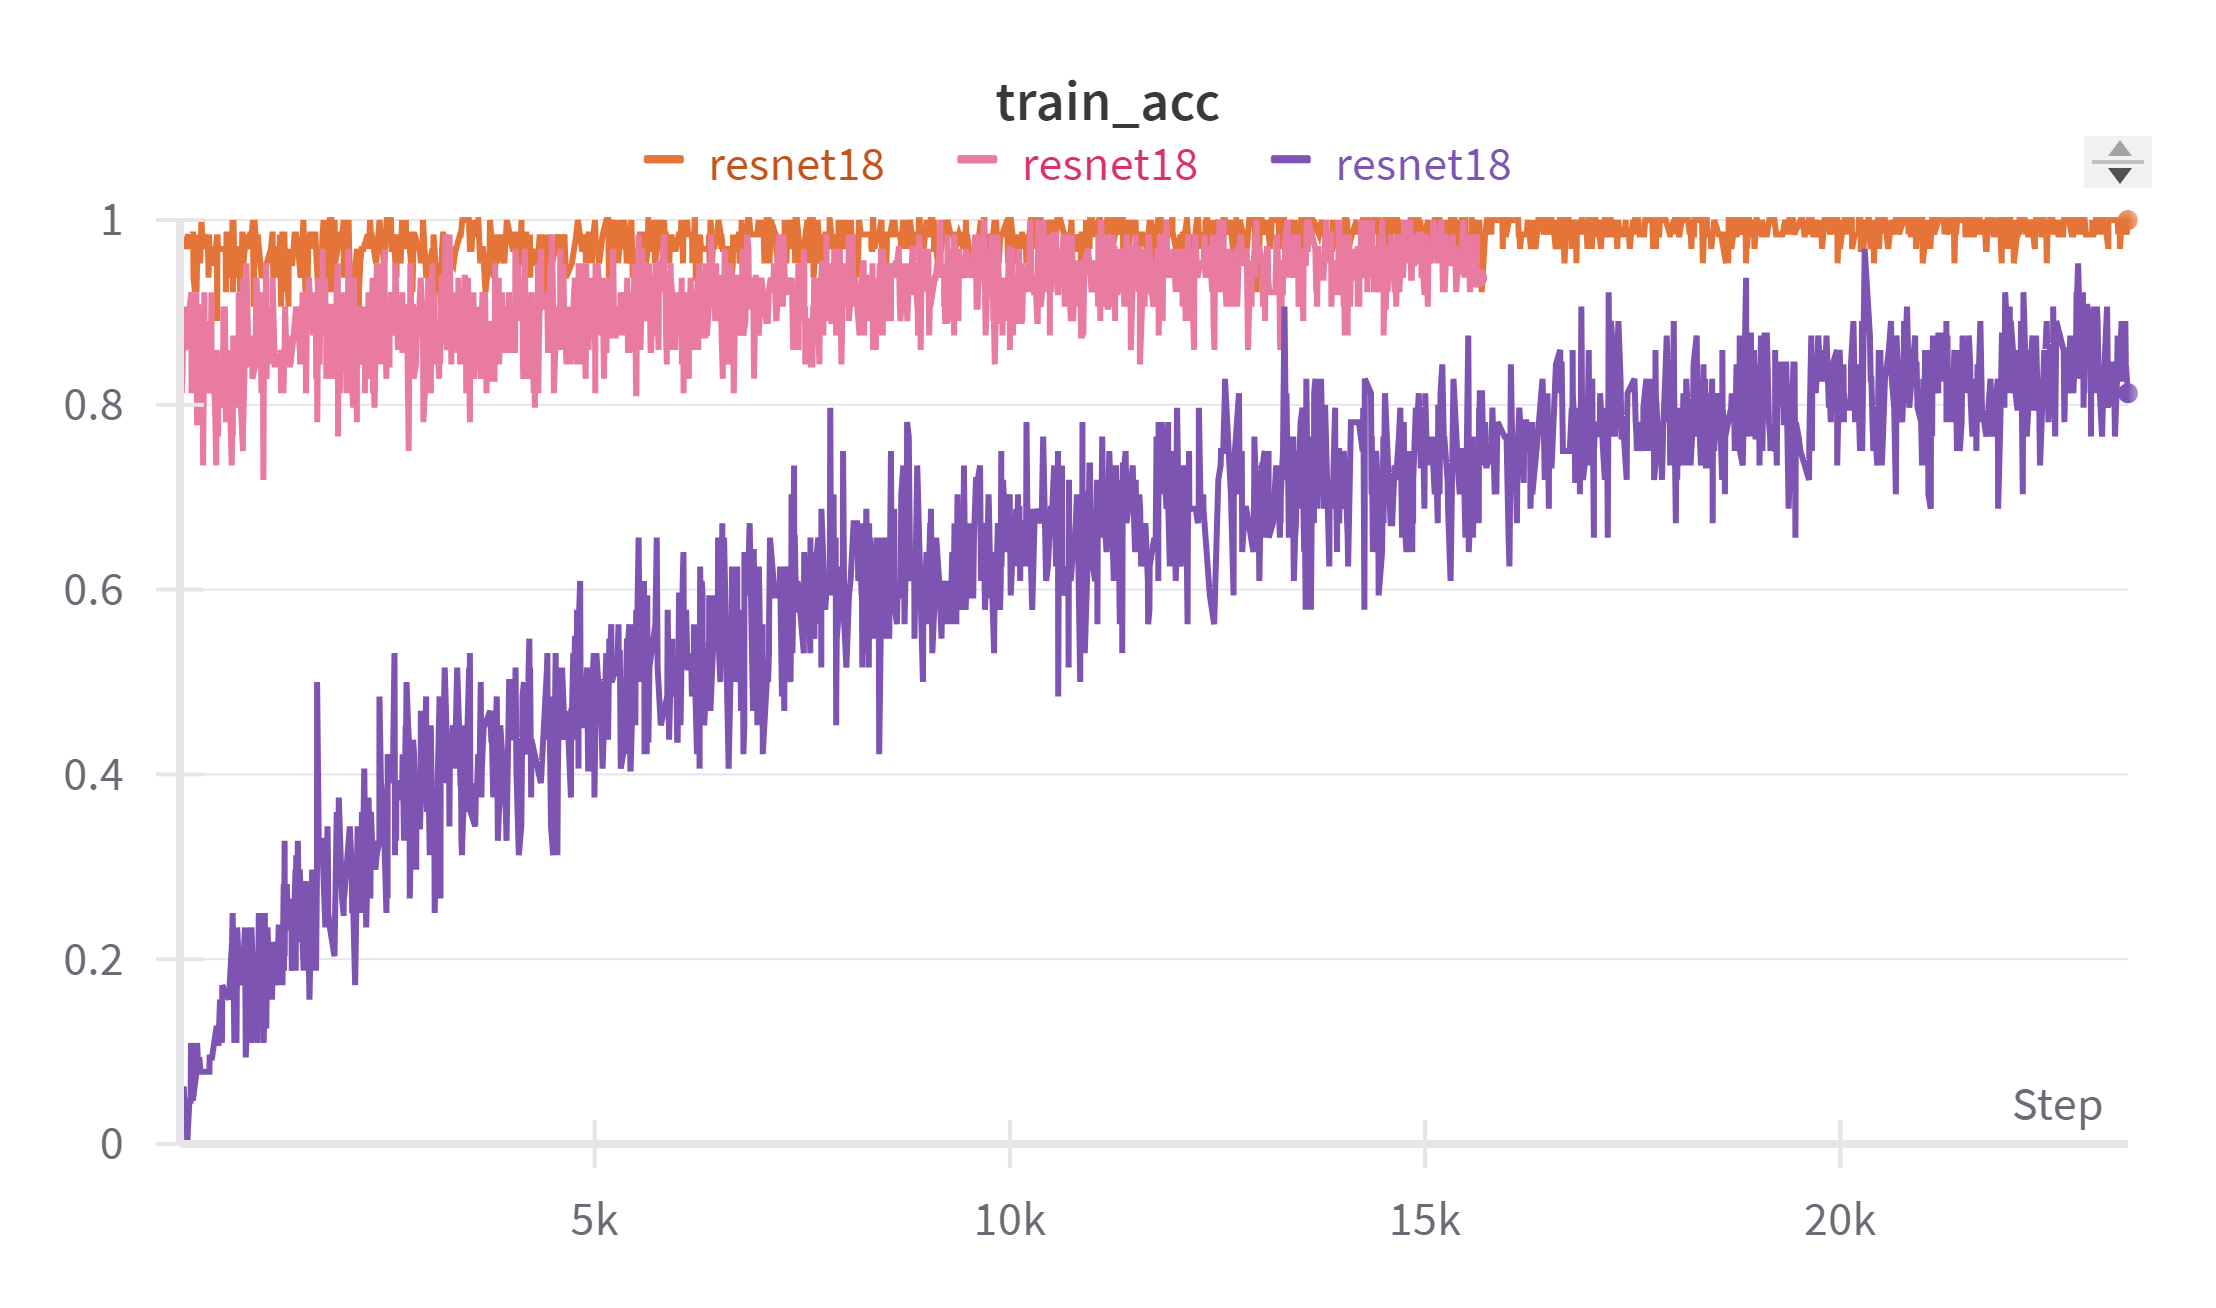

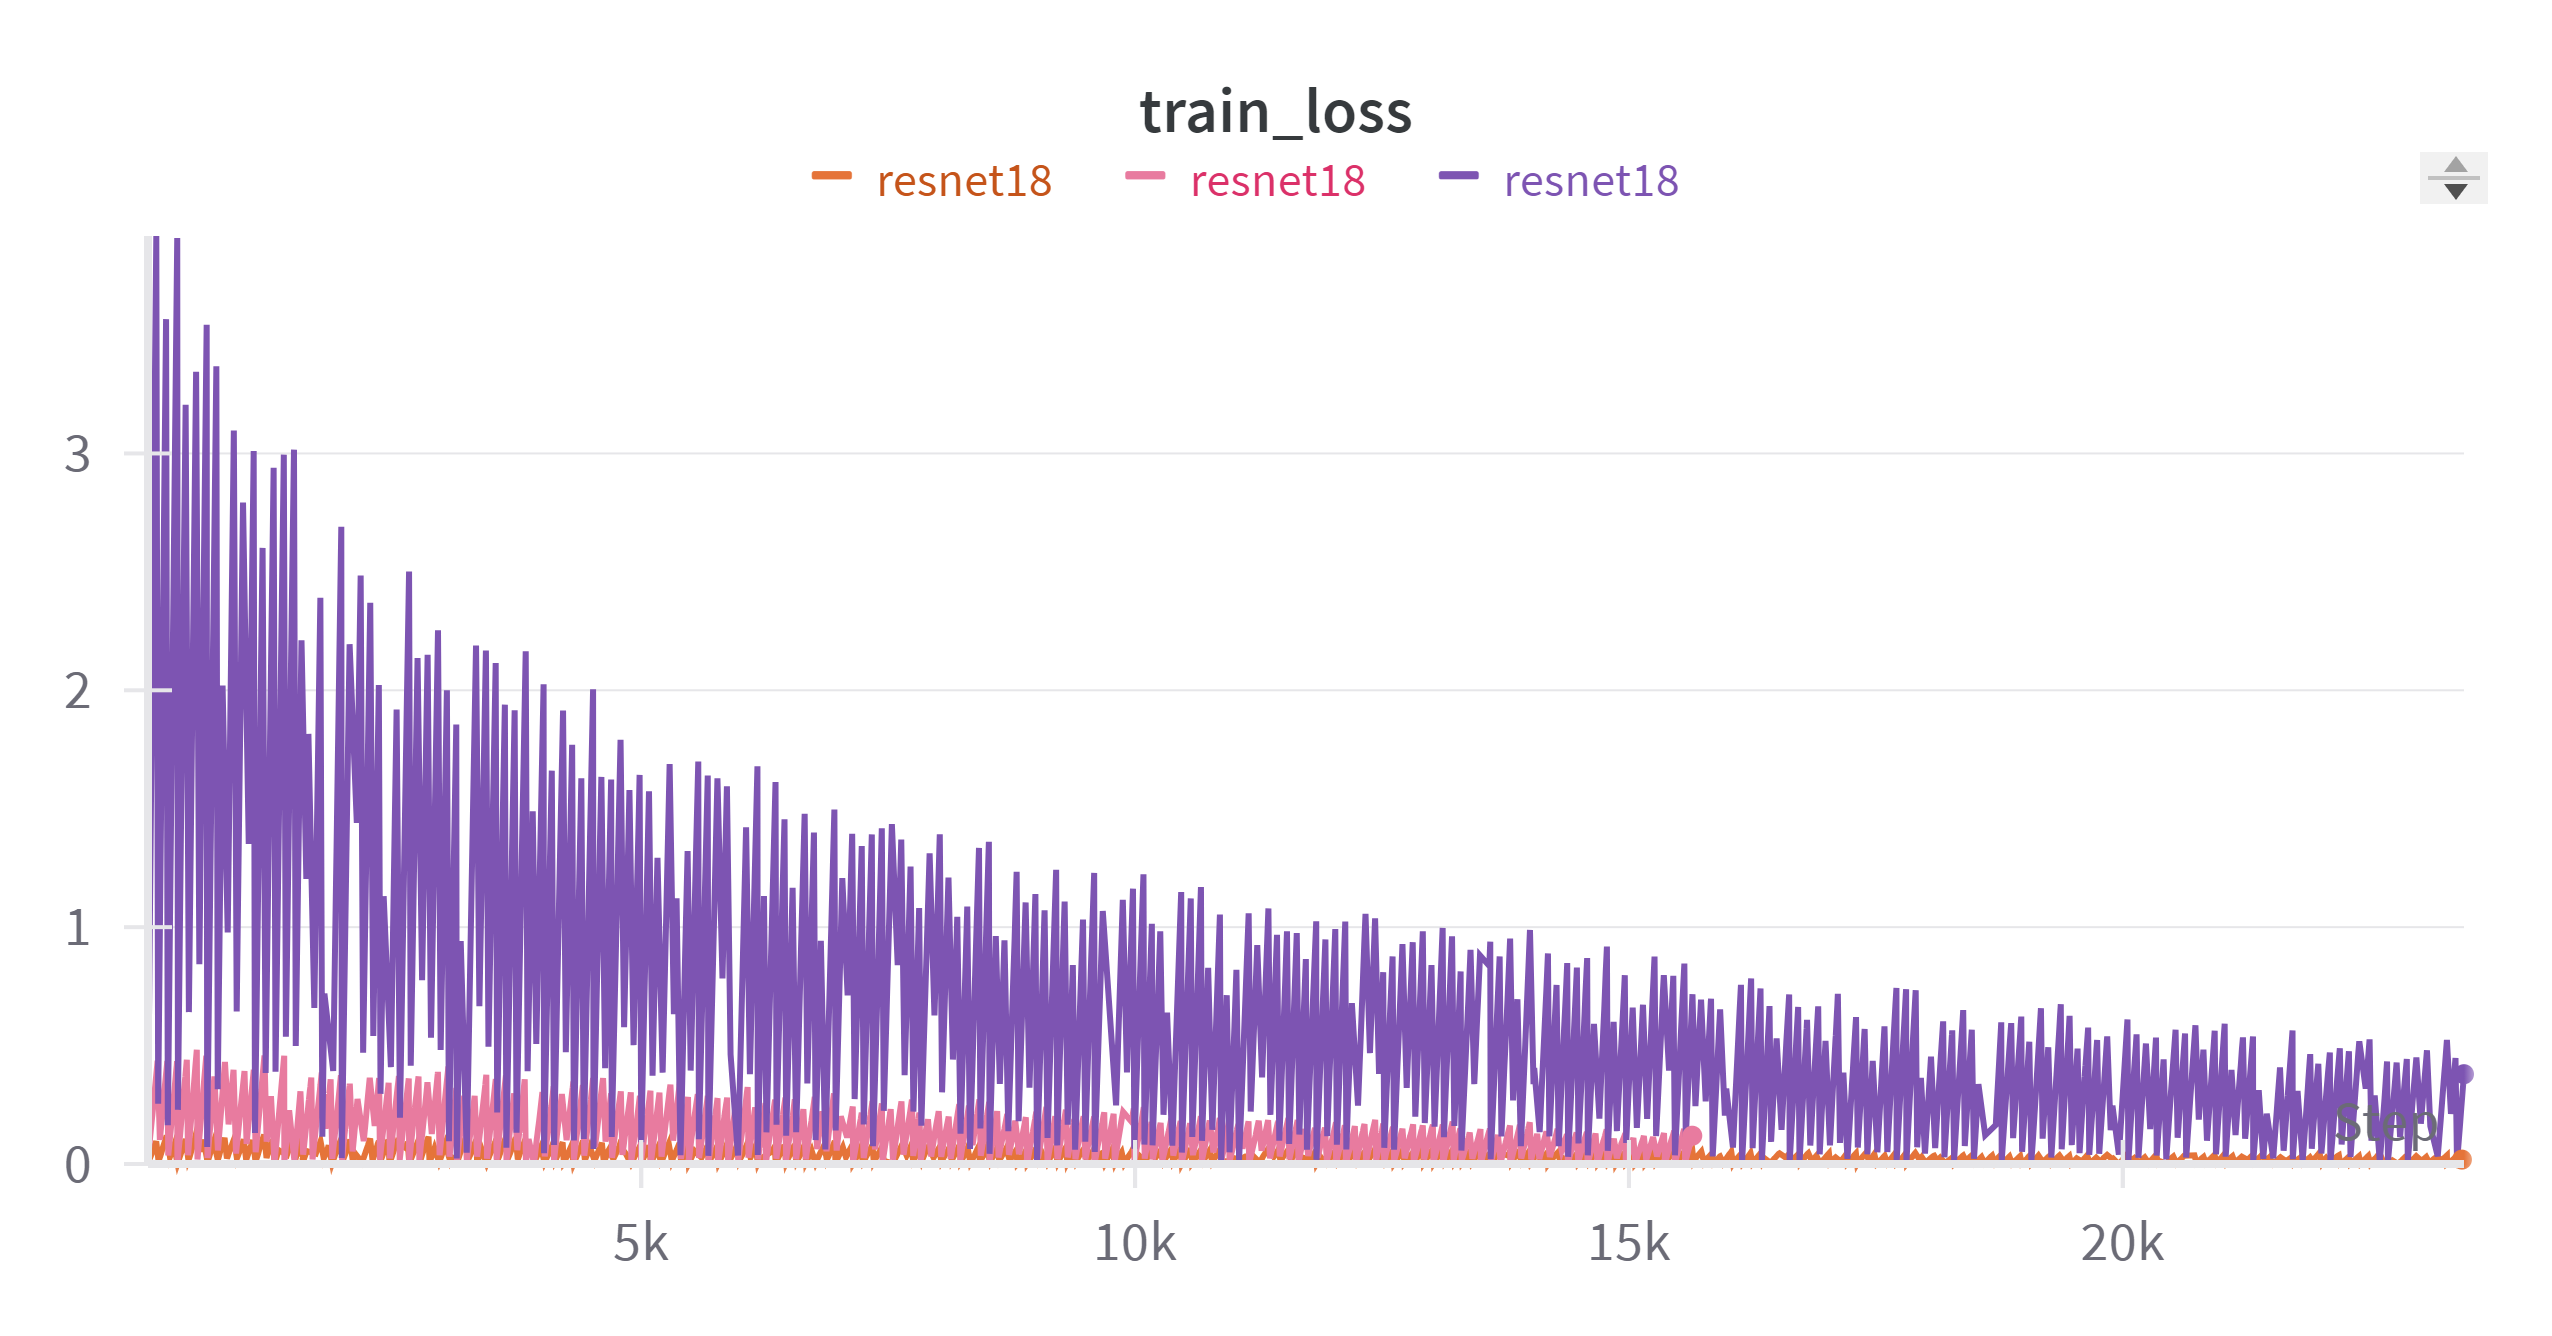

**Vision Transformer cifar100:**



**SUMMERY OF THE SLECTIVE SYNAPTIC DAMPNING**

**Goal**: To selectively "forget" specific information learned by a machine learning model without retraining.

**How it works**:

**Identify parameters to dampen**:

Analyzes the Fisher information matrix of training and "forget" data.
Selects parameters disproportionately important to the "forget" data.
Dampen selected parameters:
Reduces the weight of these parameters proportionally to their importance.
This effectively weakens their influence on the model's predictions.
Benefits:

**Fast:**

No retraining required, making it computationally efficient.
Performs well: Competitive with retraining-based methods for forgetting.
Retrain-free: Does not require long-term storage of training data.

**Applications:**

Removing sensitive information from models.
Correcting mistakes learned from incorrect data.
Adapting models to changing conditions without forgetting valuable knowledge.
Limitations:

Requires careful selection of parameters to dampen.
May not be suitable for all types of machine learning models.

**Overall:**

SSD is a promising new approach to machine unlearning that offers a fast, retrain-free way to selectively forget unwanted information from models.

In [ ]:
DEVICE=1
seed=2
#############################################################
################ CIFAR100 class FORGETTING ##################
#############################################################

forget_class="rocket" # 100 samples
dataset='Cifar100'
n_classes=100
weight_path= "/home/holistic/Desktop/machine_unlearn/VIT_cifar10059.pth" # "/content/resnet18.pt"
!python forget_full_class_main.py -net ViT -dataset $dataset -classes $n_classes -gpu -method ssd_tuning -forget_class $forget_class -weight_path $weight_path -seed $seed

Some weights of the model checkpoint at google/vit-base-patch16-224 were not used when initializing ViTModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of the model checkpoint at google/vit-base-patch16-224 were not used when initializing ViTModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Files already downloaded and verified
Files already downloaded and verified
wandb: Currently logged in as: saurabhkashid157. Use `wandb login --relogin` to force relogin
wandb: wandb version 0.16.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.13.10
wandb: Run data is saved locally in /home/holistic/Desktop/machine_unlearn/src/wandb/run-20231212_221915-fmjozql0
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run ssd_tuning
wandb: ⭐️ View project at https://wandb.ai/saurabhkashid157/R1_ViT_Cifar100_fullclass_rocket
wandb: 🚀 View run at https://wandb.ai/saurabhkashid157/R1_ViT_Cifar100_fullclass_rocket/runs/fmjozql0
{'lower_bound': 1, 'exponent': 1, 'magnitude_diff': None, 'min_layer': -1, 'max_layer': -1, 'forget_threshold': 1, 'dampening_constant': 1, 'selection_weighting': 5.0}
/home/holistic/anaconda3/envs/segform/lib/python3.8/site-packages/torch/nn/functional.py:2916: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn(
54.448646545410156 54.944095611572266 tensor(0.9761) 0.164
...
wandb:
wandb: 🚀 View run ssd_tuning at: https://wandb.ai/saurabhkashid157/R1_ViT_Cifar100_fullclass_rocket/runs/fmjozql0
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20231212_221915-fmjozql0/logs
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

In [ ]:
DEVICE=1
seed=2
#############################################################
################ CIFAR100 class FORGETTING ##################
#############################################################

forget_class="rocket" # 100 samples
dataset='Cifar100'
n_classes=100
weight_path= "/content/drive/MyDrive/dataset/selective-synaptic-dampening/resnet18_cifar100_50.pth" # "/content/resnet18.pt"
!python forget_full_class_main.py -net ResNet18 -dataset $dataset -classes $n_classes -gpu -method ssd_tuning -forget_class $forget_class -weight_path $weight_path -seed $seed

2023-12-11 03:59:17.278522: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-11 03:59:17.278571: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-11 03:59:17.278611: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-11 03:59:18.396109: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Files already downloaded and verified
Files already downloaded and verified
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 2
wandb: You chose 'Use an existing W&B account'
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.16.1
wandb: Run data is saved locally in /content/drive/MyDrive/dataset/selective-synaptic-dampening/src/wandb/run-20231211_040035-gz0s482e
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run ssd_tuning
wandb: ⭐️ View project at https://wandb.ai/saurabhkashid157/R1_ResNet18_Cifar100_fullclass_rocket
wandb: 🚀 View run at https://wandb.ai/saurabhkashid157/R1_ResNet18_Cifar100_fullclass_rocket/runs/gz0s482e
{'lower_bound': 1, 'exponent': 1, 'magnitude_diff': None, 'min_layer': -1, 'max_layer': -1, 'forget_threshold': 1, 'dampening_constant': 1, 'selection_weighting': 10}
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
...
wandb: 🚀 View run ssd_tuning at: https://wandb.ai/saurabhkashid157/R1_ResNet18_Cifar100_fullclass_rocket/runs/gz0s482e
wandb: ️⚡ View job at https://wandb.ai/saurabhkashid157/R1_ResNet18_Cifar100_fullclass_rocket/jobs/QXJ0aWZhY3RDb2xsZWN0aW9uOjEyMjU0NjA3Nw==/version_details/v0
wandb: Synced 5 W&B file(s), 0 media file(s), 2 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20231211_040035-gz0s482e/logs
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

**RESULT OF SSD ON RESNET AND VIT**

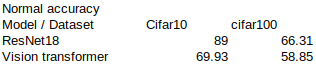

**AFTER SSD TUNNING RESULT**

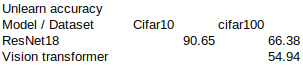

**Conclusion:**

Able to forget the class and also the random information from the model using SSD tuning while keeping about same accuracy.

**DIfficulties faced:**
1. models are too big to train on the colab specialy vision transformer.
2. don't have resource to train vit cifar10, for vit cifar100 trained on big gpu Nvidia 4090.
3. don't had resource to train fro longer so couldn't do unlerning on vit cifar10 model.



**REFERANCES:**
1. Fast Machine Unlearning Without Retraining Through Selective Synaptic
Dampening.

  https://arxiv.org/pdf/2308.07707.pdf
2. https://github.com/if-loops/selective-synaptic-dampening
